In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import pickle
import joblib

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/AUD_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74258, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,0.70137,0.70112,0.70086,0.70139
2020-01-01 17:15:00,0.70112,0.70095,0.70078,0.70159
2020-01-01 17:30:00,0.70094,0.70079,0.70067,0.70099
2020-01-01 17:45:00,0.70078,0.70060,0.70048,0.70109
2020-01-01 18:00:00,0.70062,0.70182,0.70062,0.70182


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74257, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,0.70137,0.70112,0.70086,0.70139,0.70095,17,2,1,0.00025,0.701125,0.00053,0.701185
2020-01-01 17:15:00,0.70112,0.70095,0.70078,0.70159,0.70079,17,2,1,0.00017,0.701185,0.00081,0.701110
2020-01-01 17:30:00,0.70094,0.70079,0.70067,0.70099,0.70060,17,2,1,0.00015,0.700830,0.00032,0.700848
2020-01-01 17:45:00,0.70078,0.70060,0.70048,0.70109,0.70182,17,2,1,0.00018,0.700785,0.00061,0.700738
2020-01-01 18:00:00,0.70062,0.70182,0.70062,0.70182,0.70168,18,2,1,-0.00120,0.701220,0.00120,0.701220


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,0.70137,0.70112,0.70086,0.70139,0.70095,17,2,1,0.00025,0.701125,0.00053,0.701185,-25.516752
2020-01-01 17:15:00,0.70112,0.70095,0.70078,0.70159,0.70079,17,2,1,0.00017,0.701185,0.00081,0.701110,-25.516584
2020-01-01 17:30:00,0.70094,0.70079,0.70067,0.70099,0.70060,17,2,1,0.00015,0.700830,0.00032,0.700848,-25.516584
2020-01-01 17:45:00,0.70078,0.70060,0.70048,0.70109,0.70182,17,2,1,0.00018,0.700785,0.00061,0.700738,-25.516554
2020-01-01 18:00:00,0.70062,0.70182,0.70062,0.70182,0.70168,18,2,1,-0.00120,0.701220,0.00120,0.701220,-25.516905


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.70137  0.70086  0.70139         0.70095    17    2   
2020-01-01 17:15:00  0.70112  0.70078  0.70159         0.70079    17    2   
2020-01-01 17:30:00  0.70094  0.70067  0.70099         0.70060    17    2   
2020-01-01 17:45:00  0.70078  0.70048  0.70109         0.70182    17    2   
2020-01-01 18:00:00  0.70062  0.70062  0.70182         0.70168    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00025   0.701125  0.00053    0.701185 -25.516752  
2020-01-01 17:15:00     1   0.00017   0.701185  0.00081    0.701110 -25.516584  
2020-01-01 17:30:00     1   0.00015   0.700830  0.00032    0.700848 -25.516584  
2020-01-01 17:45:00     1   0.00018   0.700785  0.00061

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59405
59405
7500
7500
7352
7352


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(59405, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59380, 24, 12)
(7475, 24, 12)
(7327, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59380, 1)
(7475, 1)
(7327, 1)


array([[0.5947361 ],
       [0.593925  ],
       [0.5944116 ],
       ...,
       [0.61659503],
       [0.61890674],
       [0.6258011 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.5947361 , 0.593925  , 0.5944116 , ..., 0.61659503, 0.61890674,
       0.6258011 ], dtype=float32)

In [ ]:
TargetIndex = df.columns.tolist().index('close')
HighIndex = df.columns.tolist().index('high')
LowIndex = df.columns.tolist().index('low')

In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/Thesis Dataset/AUD15minGRU.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 512.4902 - mae: 9.6819 - mse: 512.4902 - root_mean_squared_error: 22.6382 - mape: 243057.9531
Epoch 1: val_mse improved from inf to 3.24039, saving model to /content/drive/MyDrive/Thesis Dataset/AUD15minGRU.hdf5
464/464 [==============================] - 104s 211ms/step - loss: 512.4902 - mae: 9.6819 - mse: 512.4902 - root_mean_squared_error: 22.6382 - mape: 243057.9531 - val_loss: 3.2404 - val_mae: 1.7866 - val_mse: 3.2404 - val_root_mean_squared_error: 1.8001 - val_mape: 300938.5938
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.8056 - mae: 0.6856 - mse: 0.8056 - root_mean_squared_error: 0.8975 - mape: 12071.4980
Epoch 2: val_mse improved from 3.24039 to 0.08927, saving model to /content/drive/MyDrive/Thesis Dataset/AUD15minGRU.hdf5
464/464 [==============================] - 93s 201ms/step - loss: 0.8056 - mae: 0.6856 - mse: 0.8056 - root_mean_squared_error: 0.8975 - mape: 12071.4980 - val_

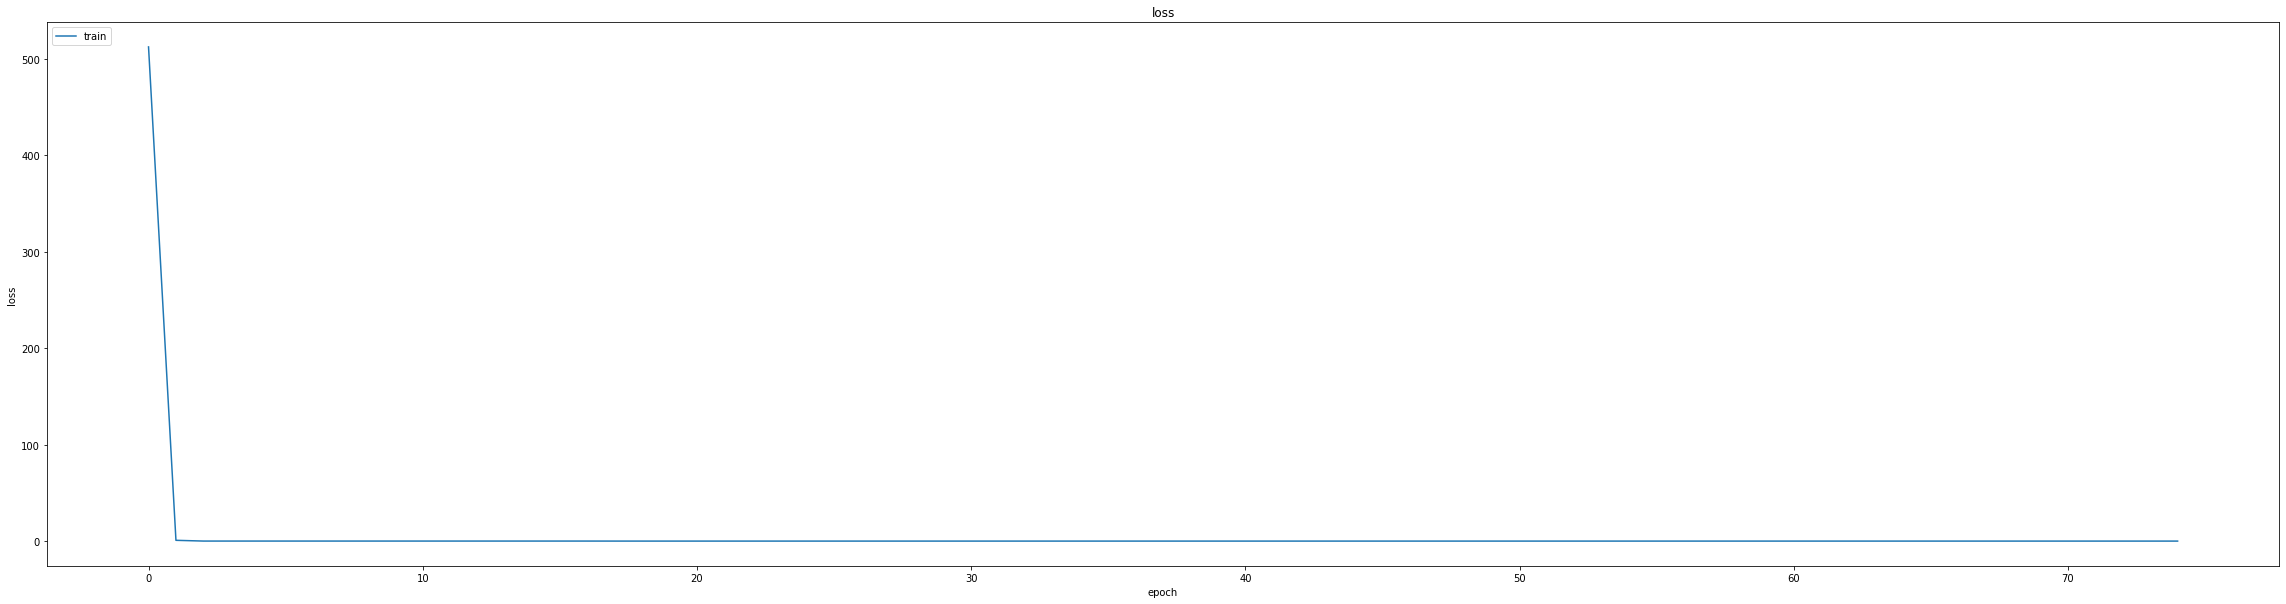

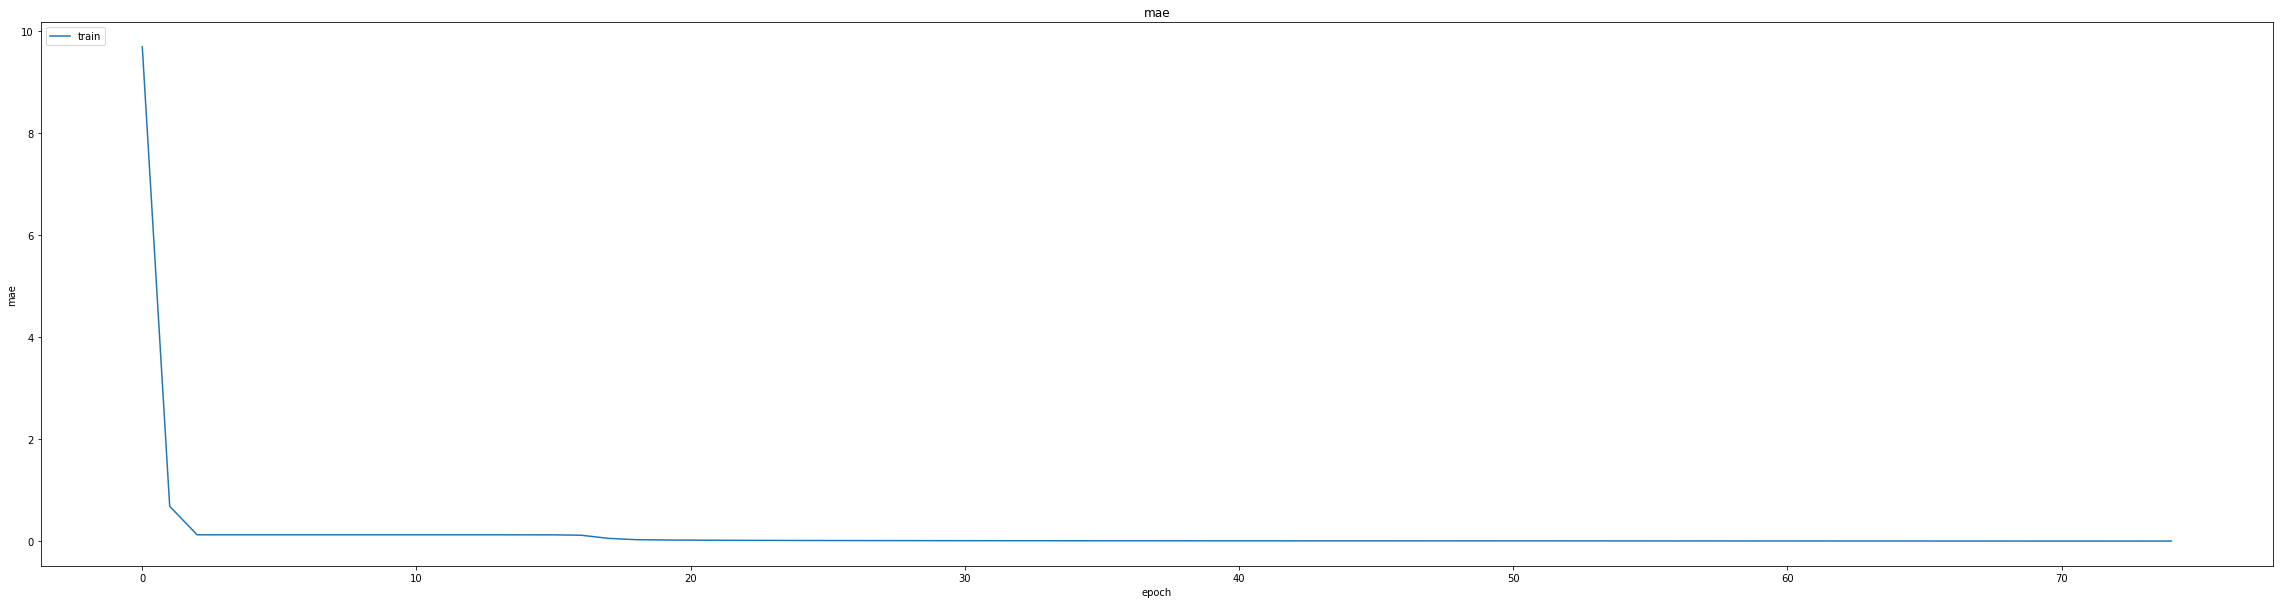

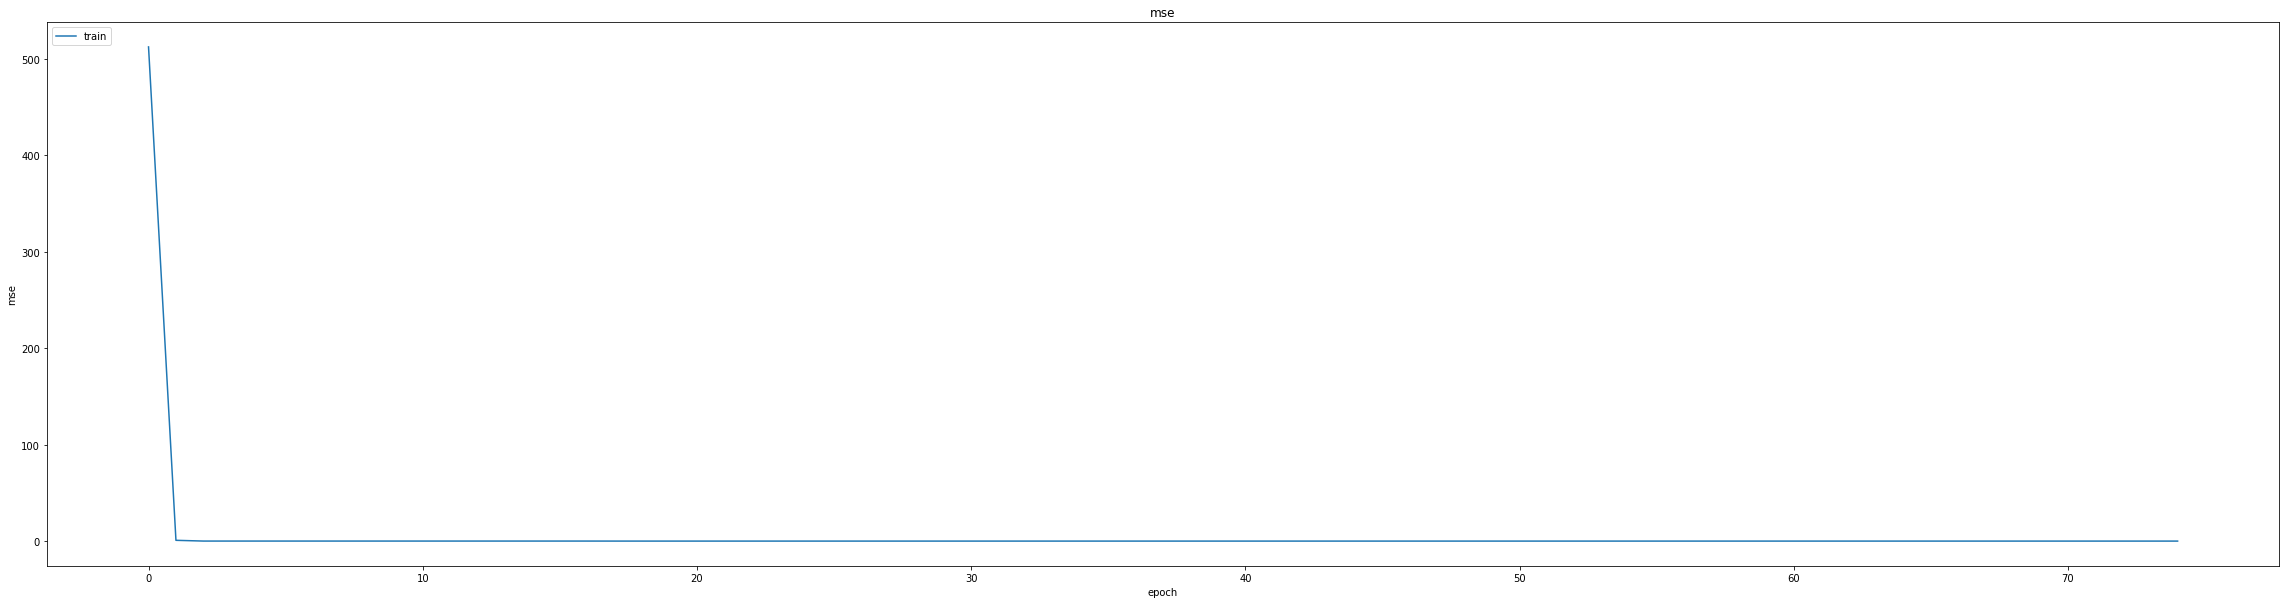

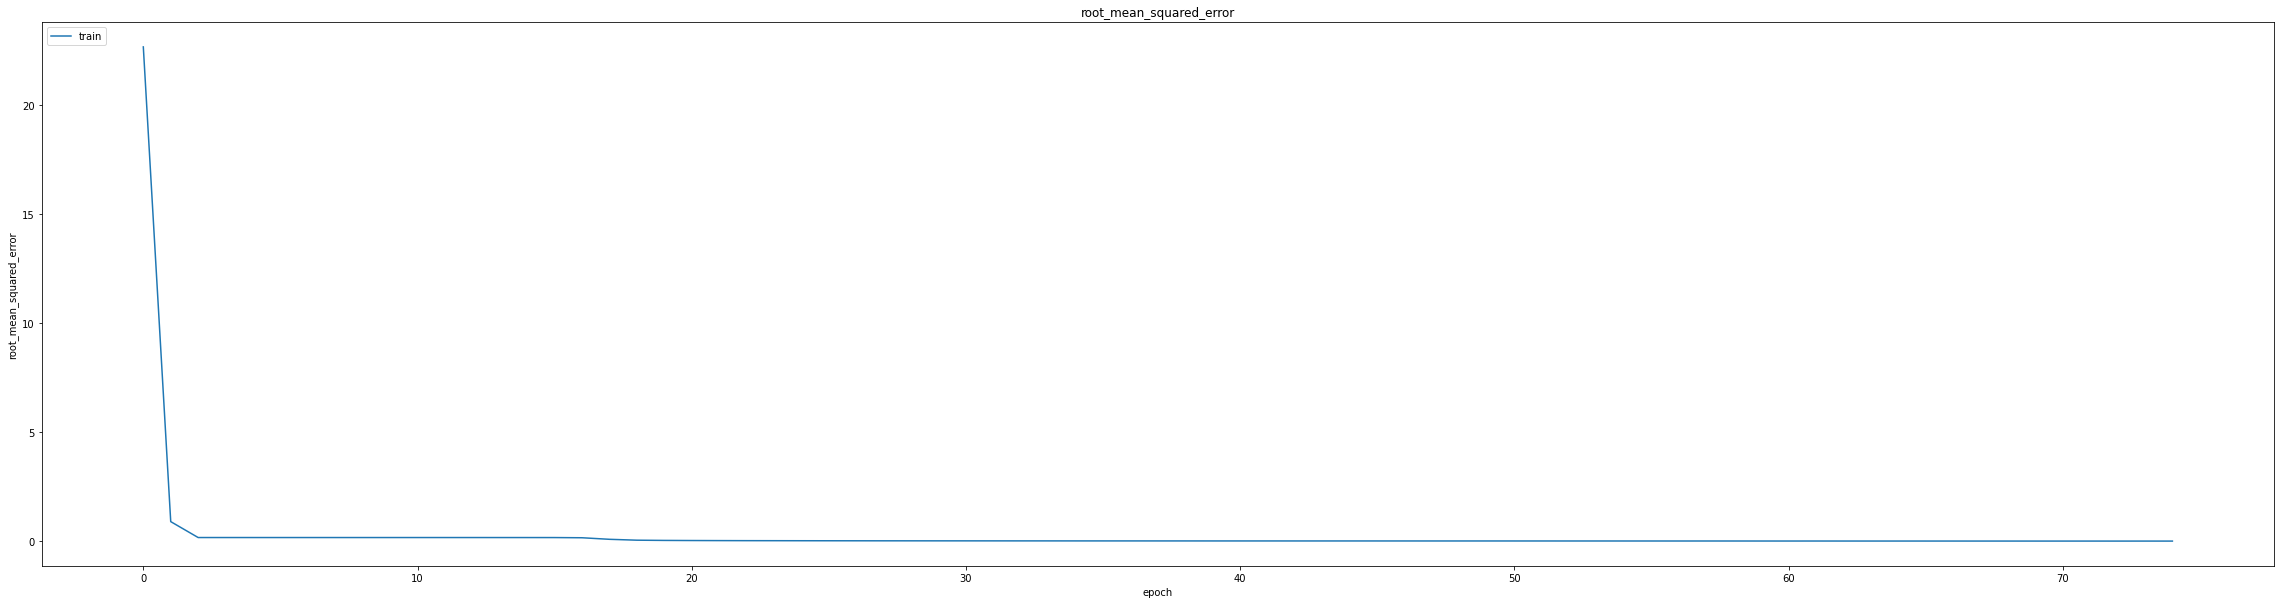

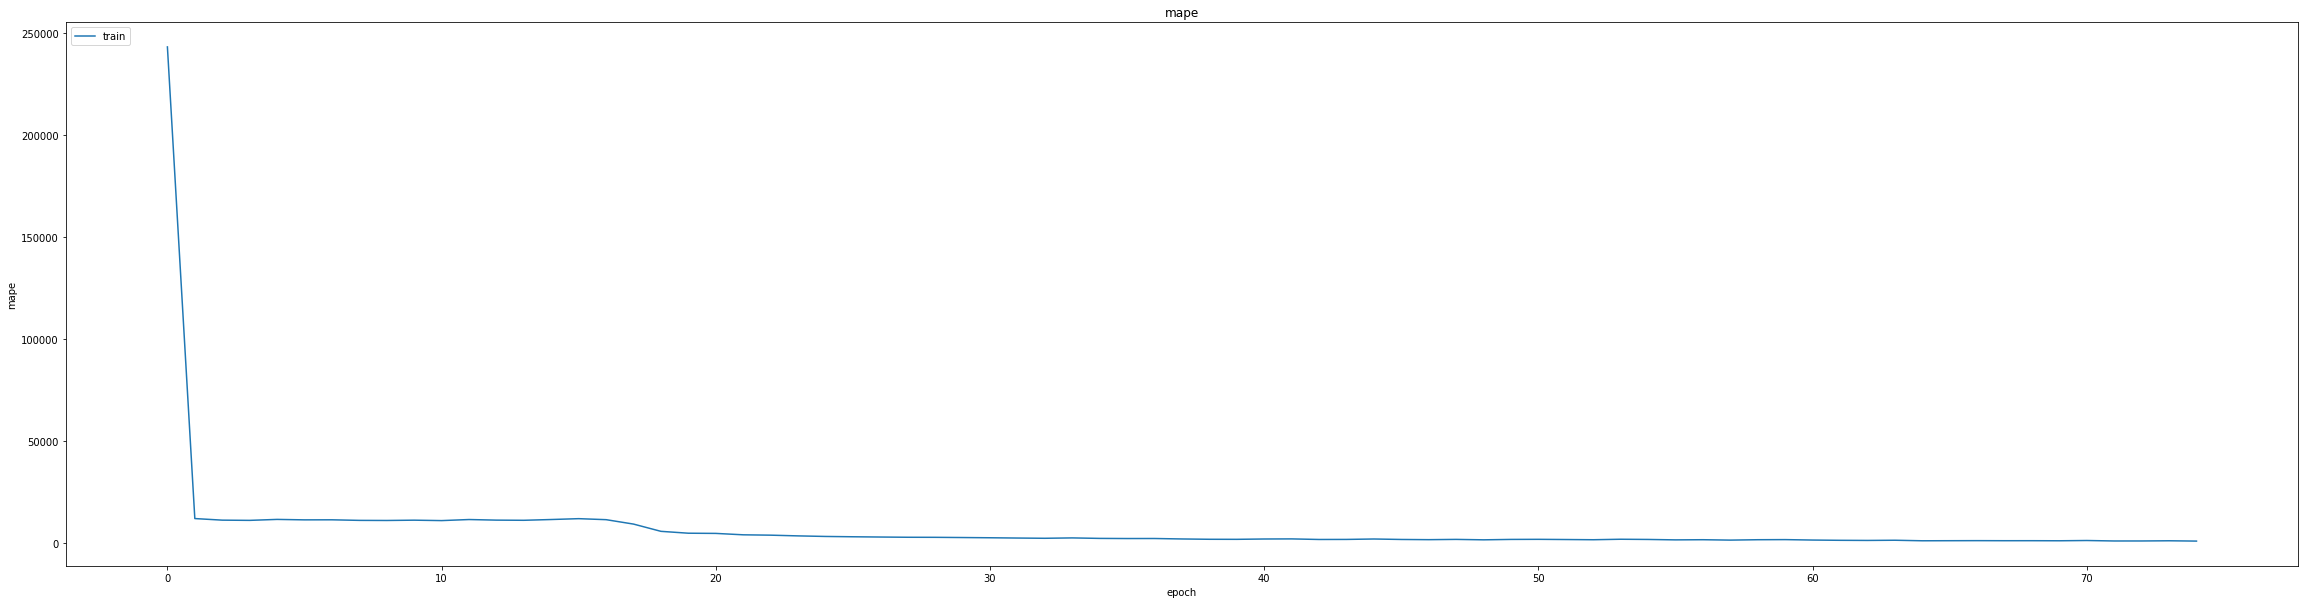

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.022364923730492592
0.029110953211784363
234/234 [==============================] - 7s 24ms/step
0.9812663131167784


In [ ]:
model.load_weights("/content/drive/MyDrive/Thesis Dataset/AUD15minGRU.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 1.7052e-04 - mae: 0.0067 - mse: 1.7052e-04 - root_mean_squared_error: 0.0131 - mape: 1205.8418
Epoch 1: val_mse did not improve from 0.00085
464/464 [==============================] - 96s 193ms/step - loss: 1.7052e-04 - mae: 0.0067 - mse: 1.7052e-04 - root_mean_squared_error: 0.0131 - mape: 1205.8418 - val_loss: 9.4794e-04 - val_mae: 0.0243 - val_mse: 9.4794e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 9273.1904 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 3.3703e-05 - mae: 0.0044 - mse: 3.3703e-05 - root_mean_squared_error: 0.0058 - mape: 1110.3766
Epoch 2: val_mse did not improve from 0.00085
464/464 [==============================] - 88s 191ms/step - loss: 3.3703e-05 - mae: 0.0044 - mse: 3.3703e-05 - root_mean_squared_error: 0.0058 - mape: 1110.3766 - val_loss: 0.0010 - val_mae: 0.0262 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 9305.8076 - lr:

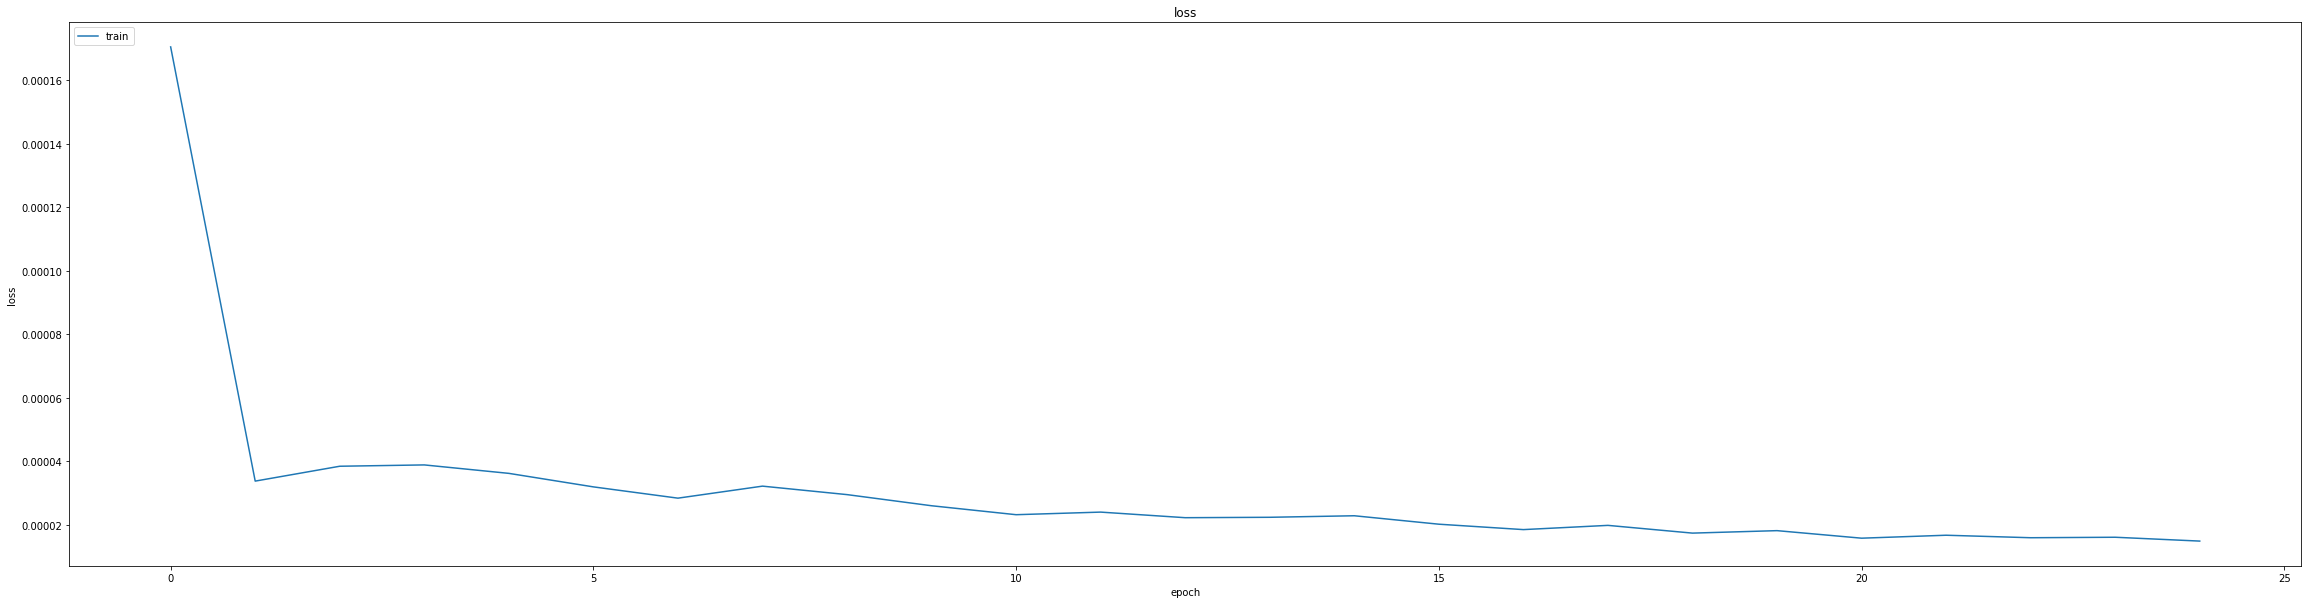

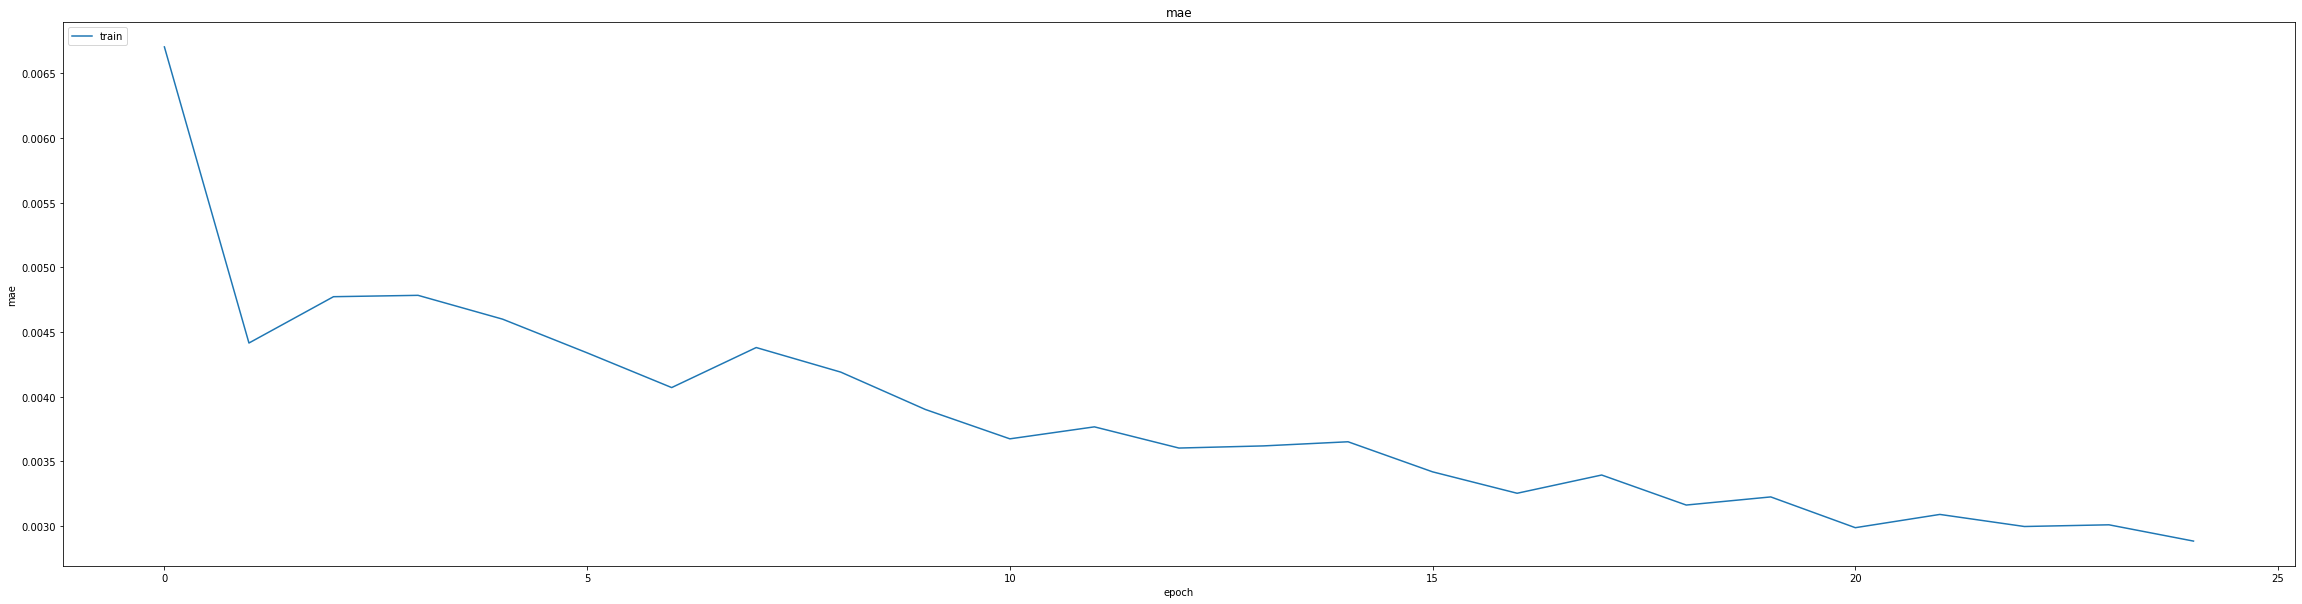

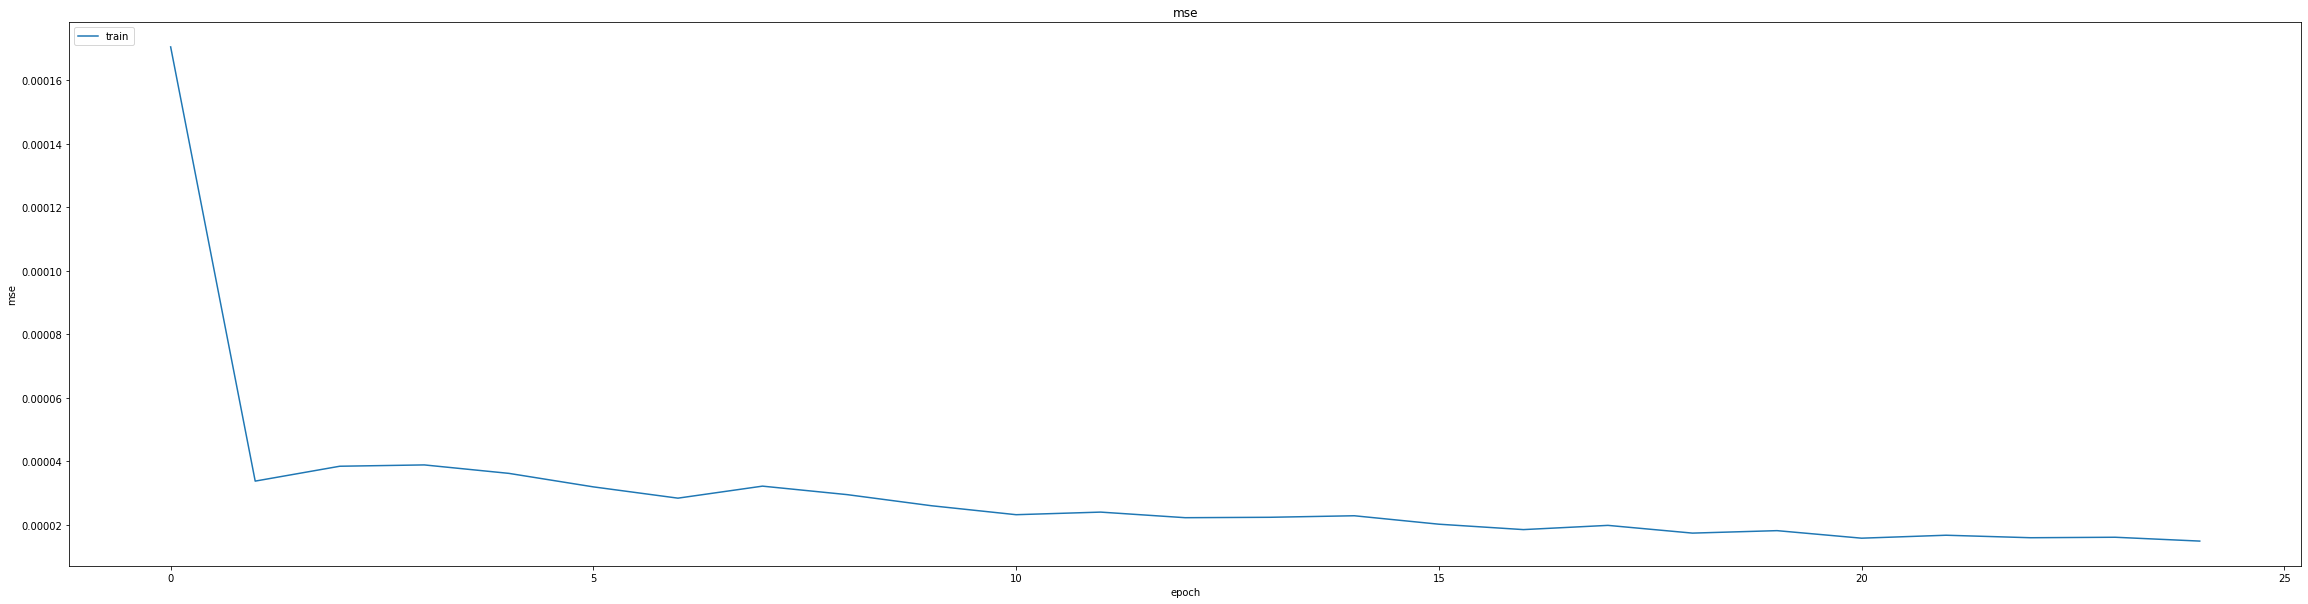

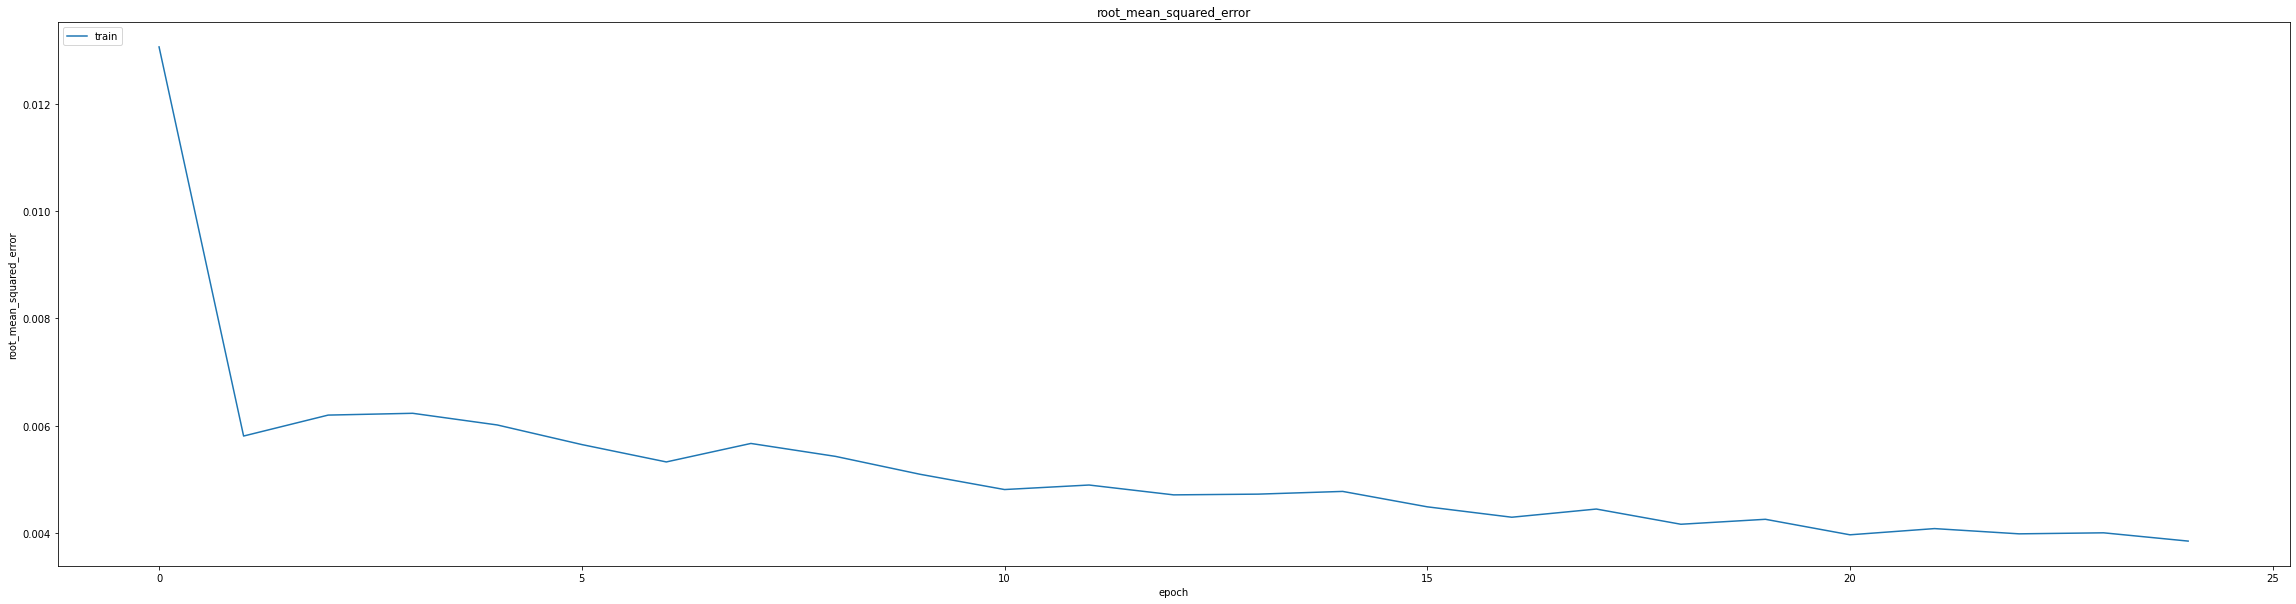

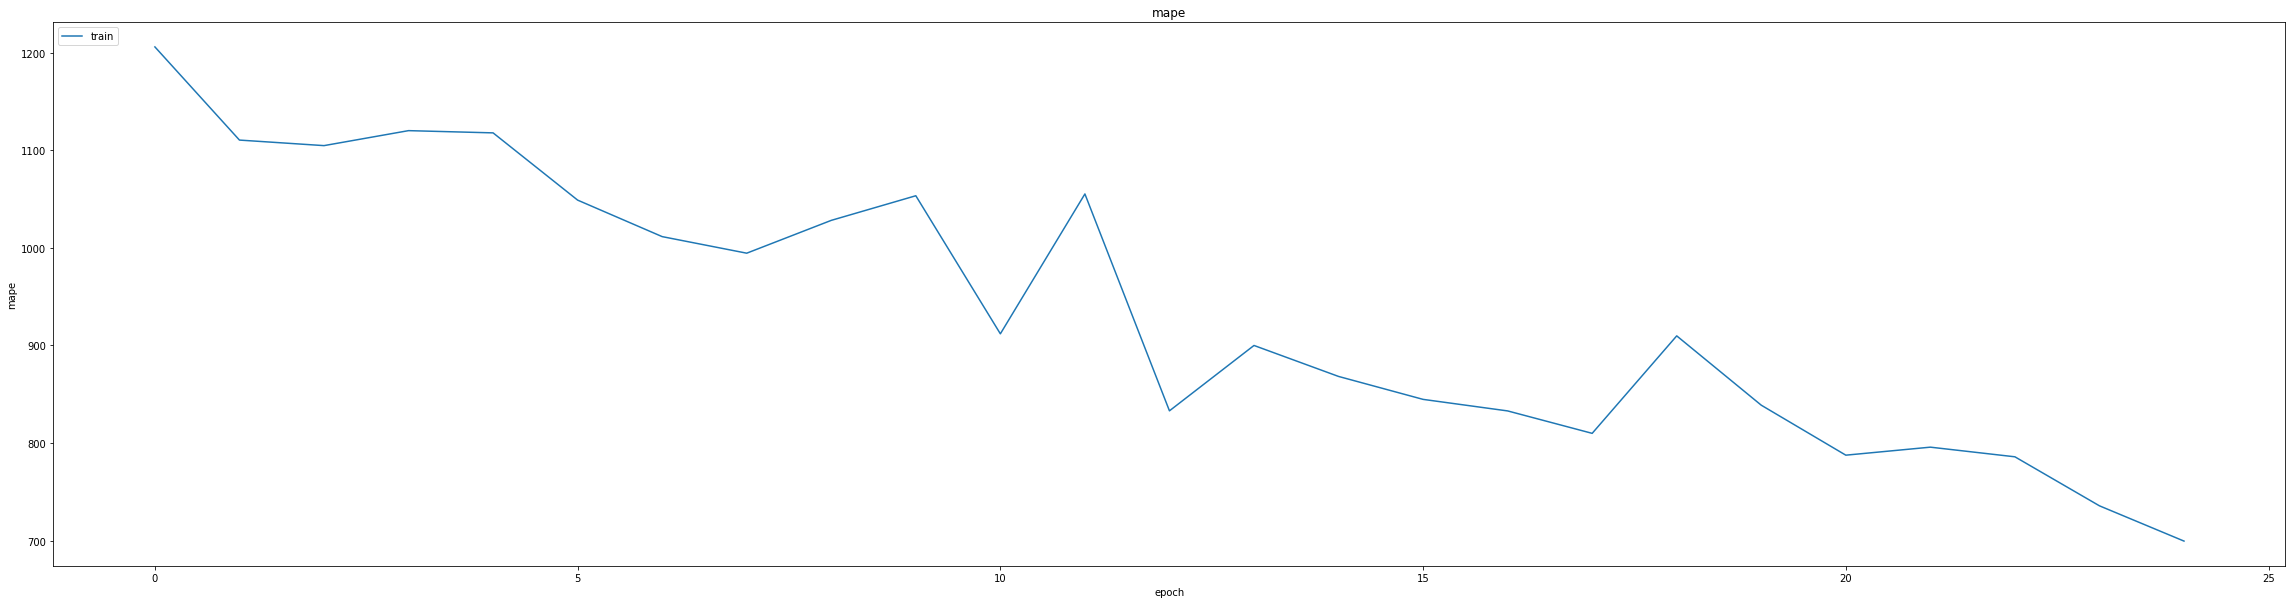

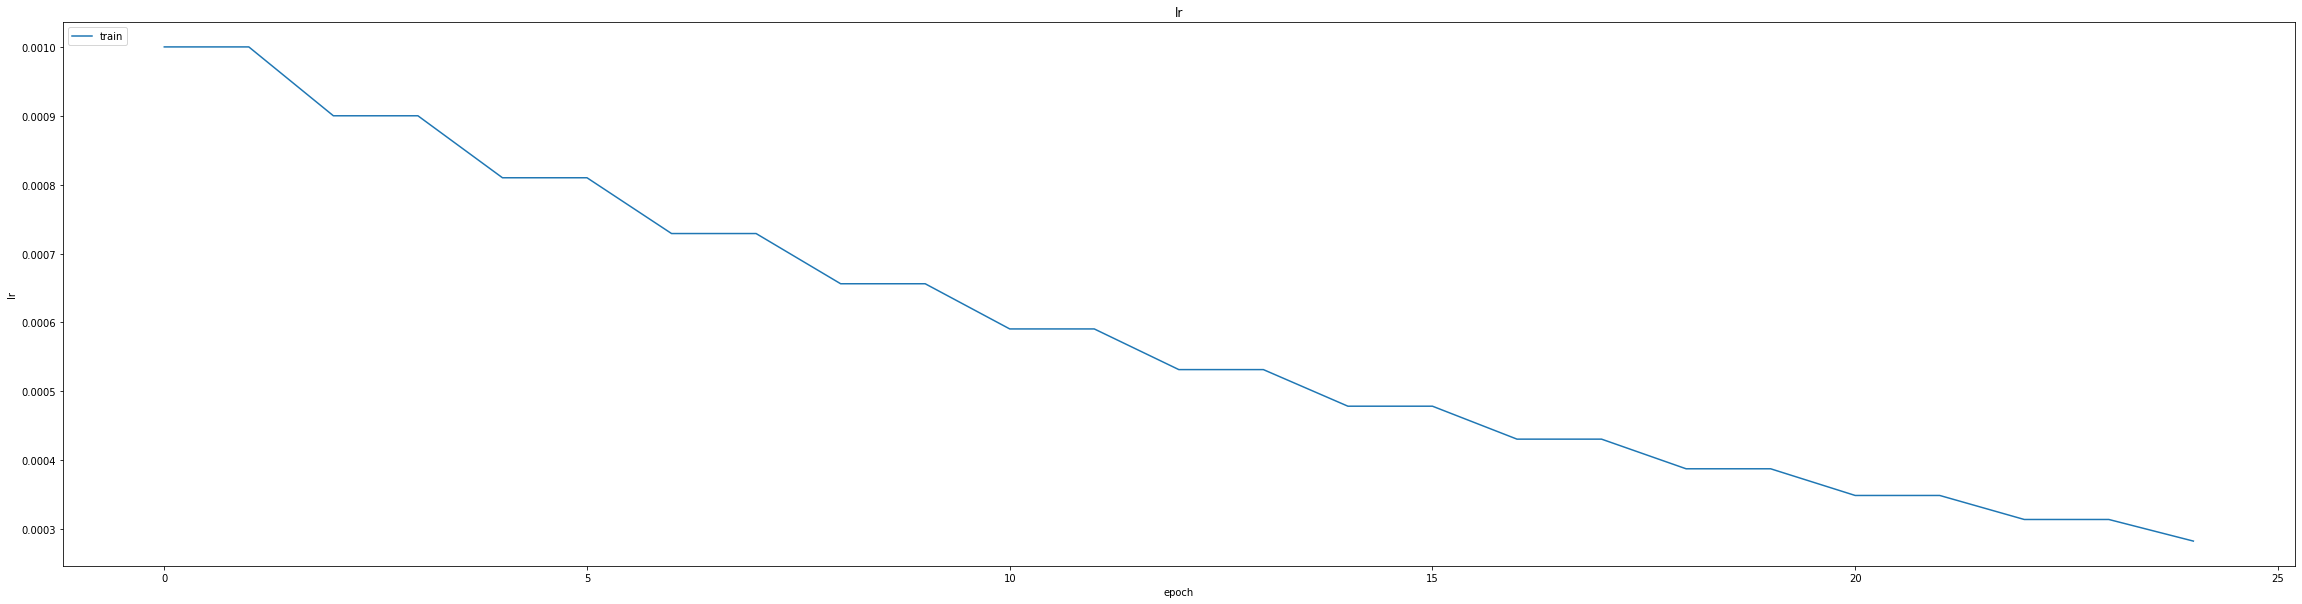

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.021819153800606728
0.027026429772377014
234/234 [==============================] - 7s 26ms/step
0.9808669181444166


234/234 [==============================] - 8s 34ms/step


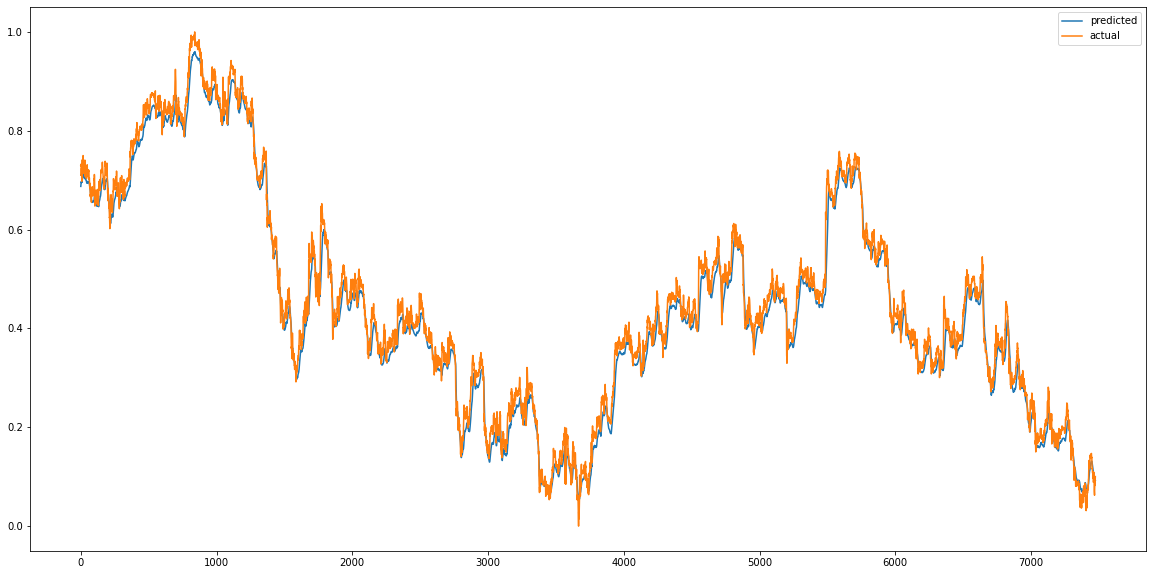

In [ ]:
model.load_weights("/content/drive/MyDrive/Thesis Dataset/AUD15minGRU.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


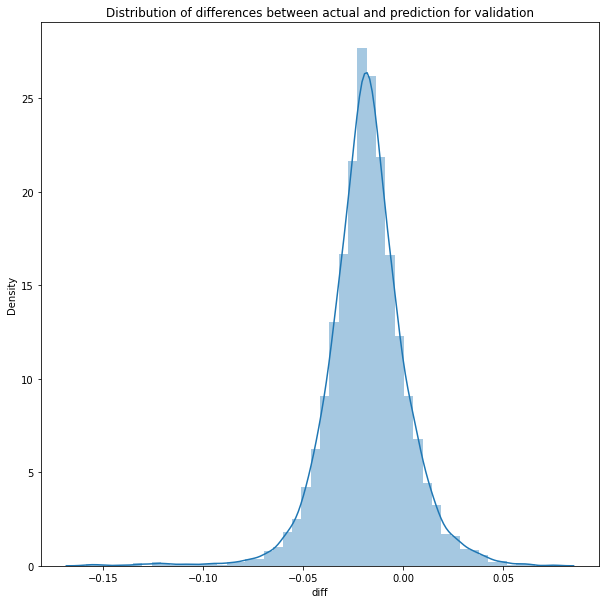

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 6s 26ms/step


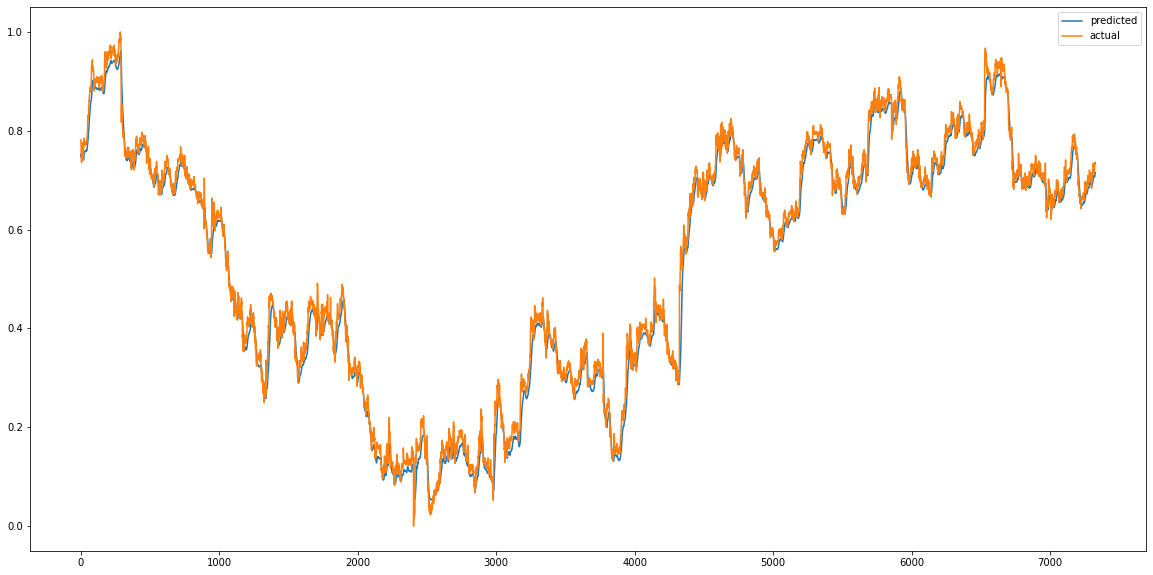

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


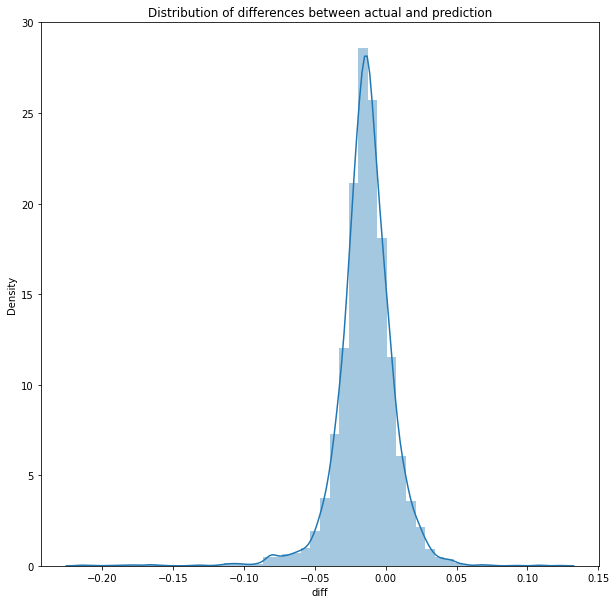

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0006115815152105262
MAE :  0.01848675010585274
RMSE  : 0.02473017418479955
229/229 [==============================] - 6s 26ms/step
R2_Score  : 0.990162862634998


count    7327.000000
mean       -0.014272
std         0.020197
min        -0.215175
25%        -0.023369
50%        -0.013724
75%        -0.003872
max         0.122416
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          164864    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 264.6427 - mae: 2.1917 - mse: 264.6427 - root_mean_squared_error: 16.2678 - mape: 9567.8252
Epoch 1: val_mse improved from inf to 0.06764, saving model to weights.best.hdf5
464/464 [==============================] - 153s 308ms/step - loss: 264.6427 - mae: 2.1917 - mse: 264.6427 - root_mean_squared_error: 16.2678 - mape: 9567.8252 - val_loss: 0.0676 - val_mae: 0.2247 - val_mse: 0.0676 - val_root_mean_squared_error: 0.2601 - val_mape: 80944.9297
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0330 - mae: 0.1439 - mse: 0.0330 - root_mean_squared_error: 0.1818 - mape: 10858.6387
Epoch 2: val_mse did not improve from 0.06764
464/464 [==============================] - 137s 296ms/step - loss: 0.0330 - mae: 0.1439 - mse: 0.0330 - root_mean_squared_error: 0.1818 - mape: 10858.6387 - val_loss: 0.0944 - val_mae: 0.2684 - val_mse: 0.0944 - val_root_mean_squared_error: 0.3073 - val_mape: 91536.7031
Epoch 3

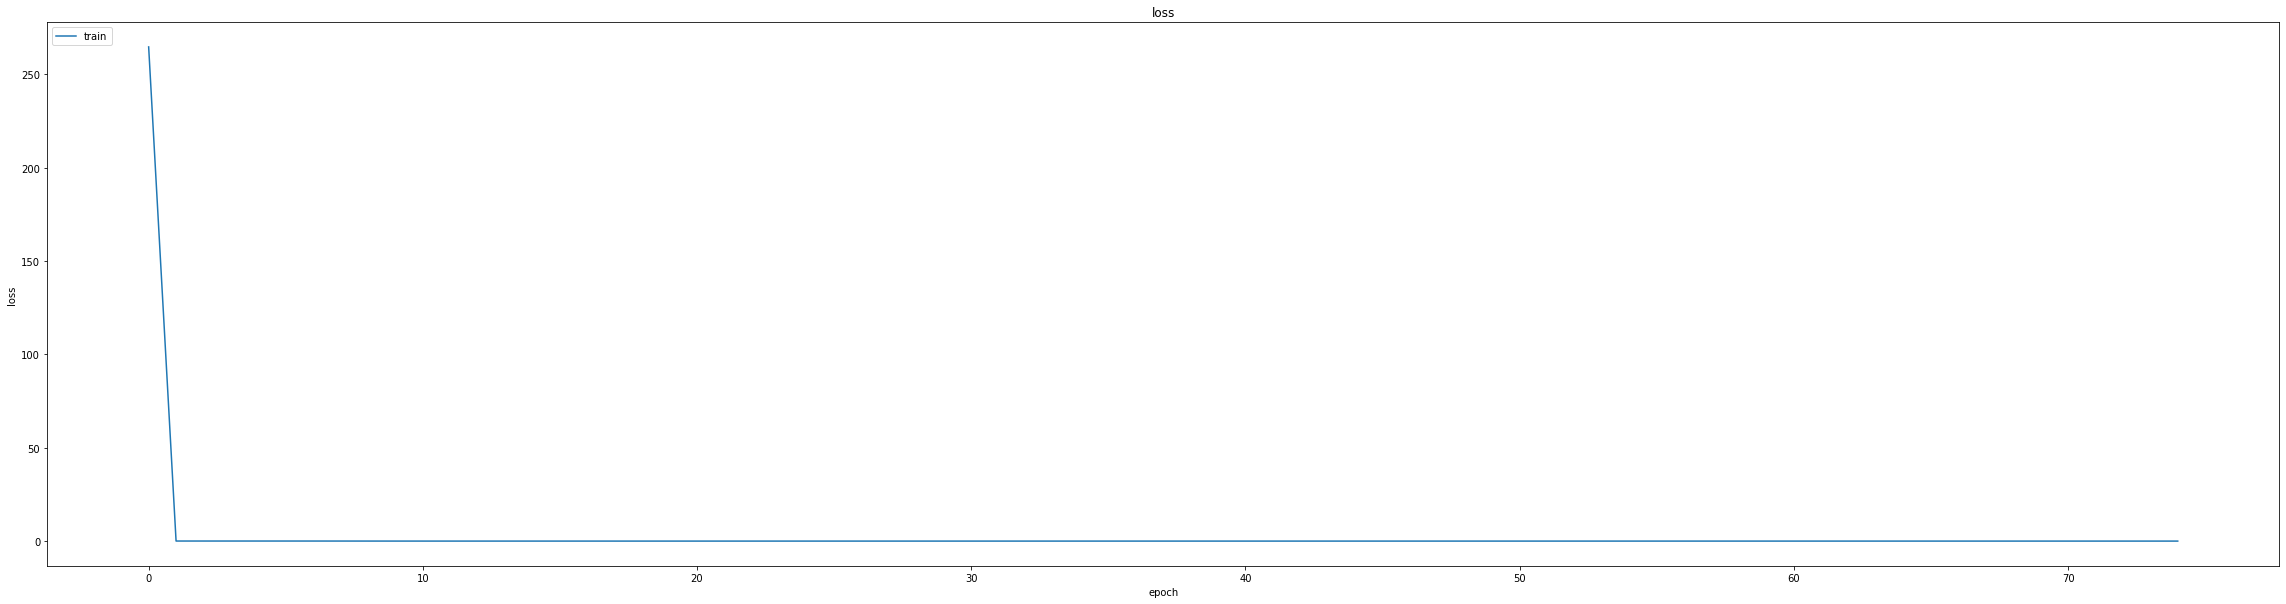

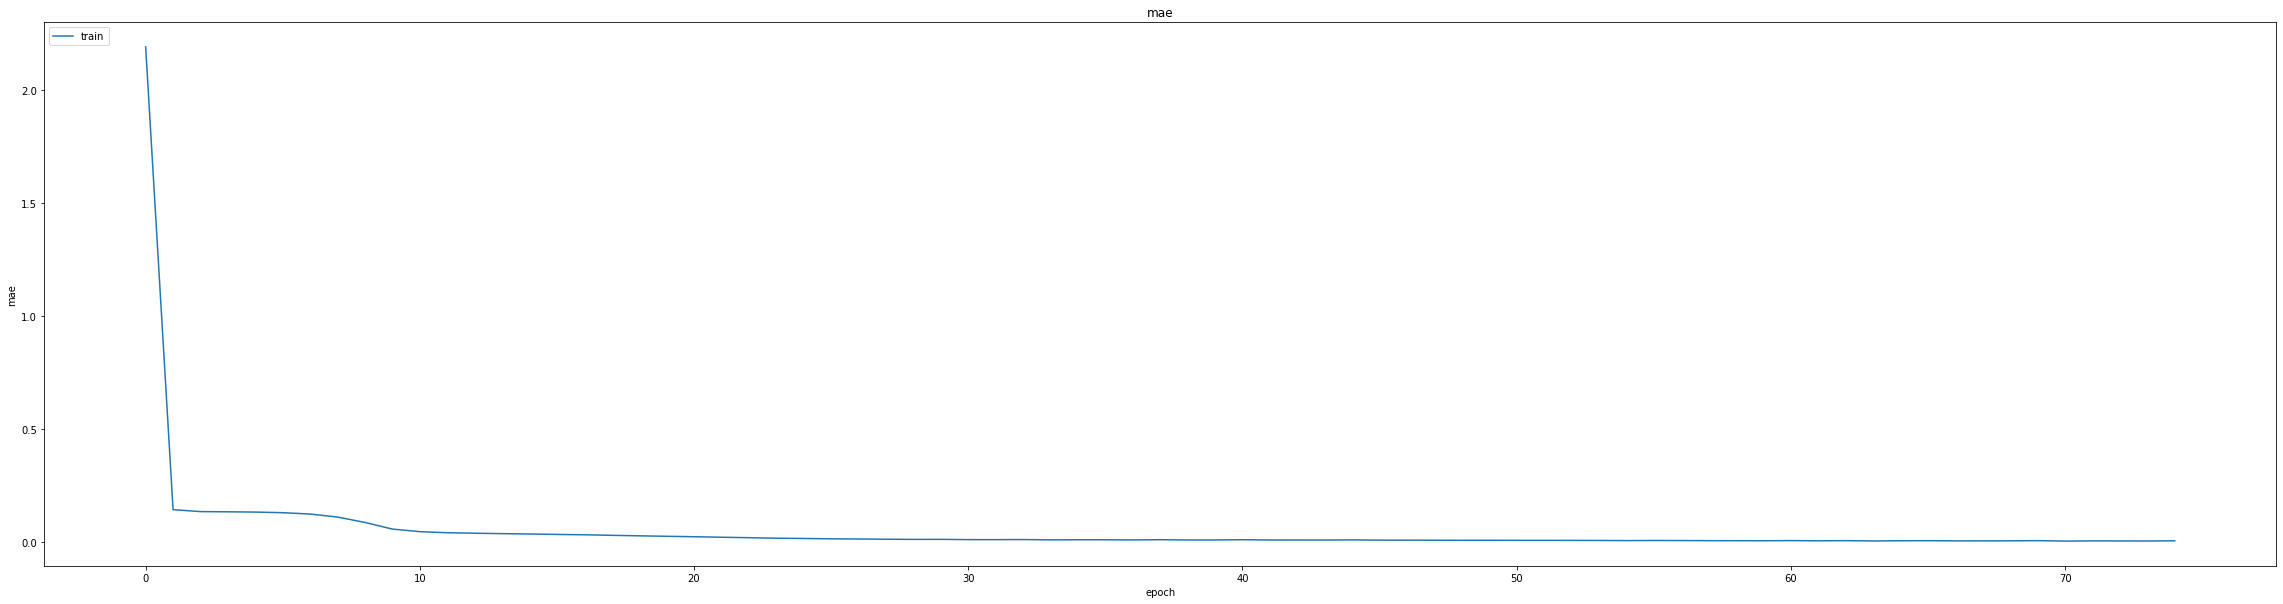

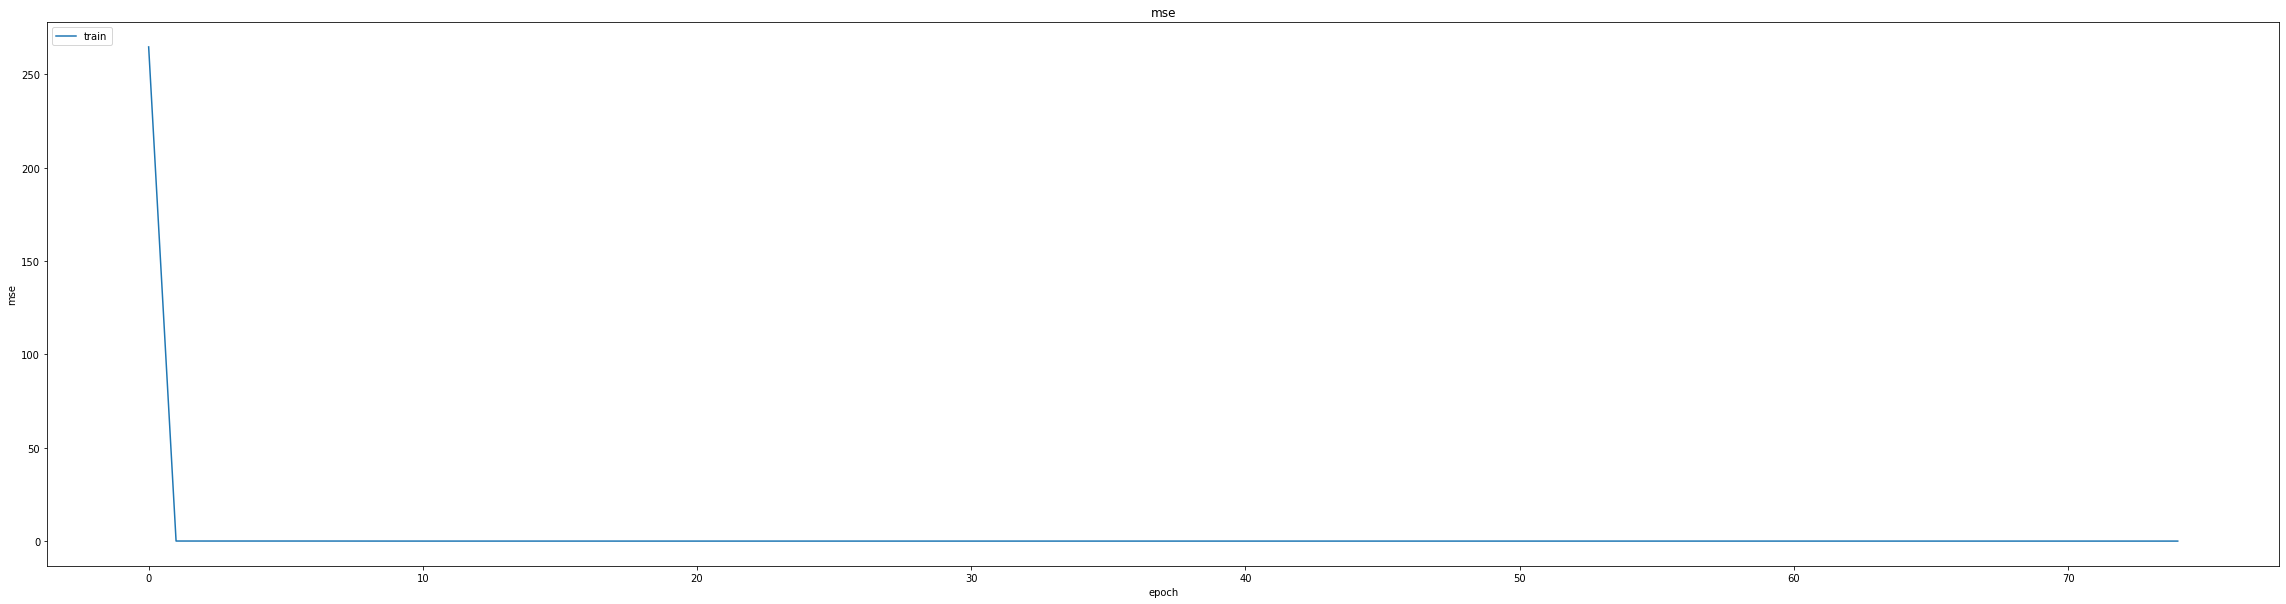

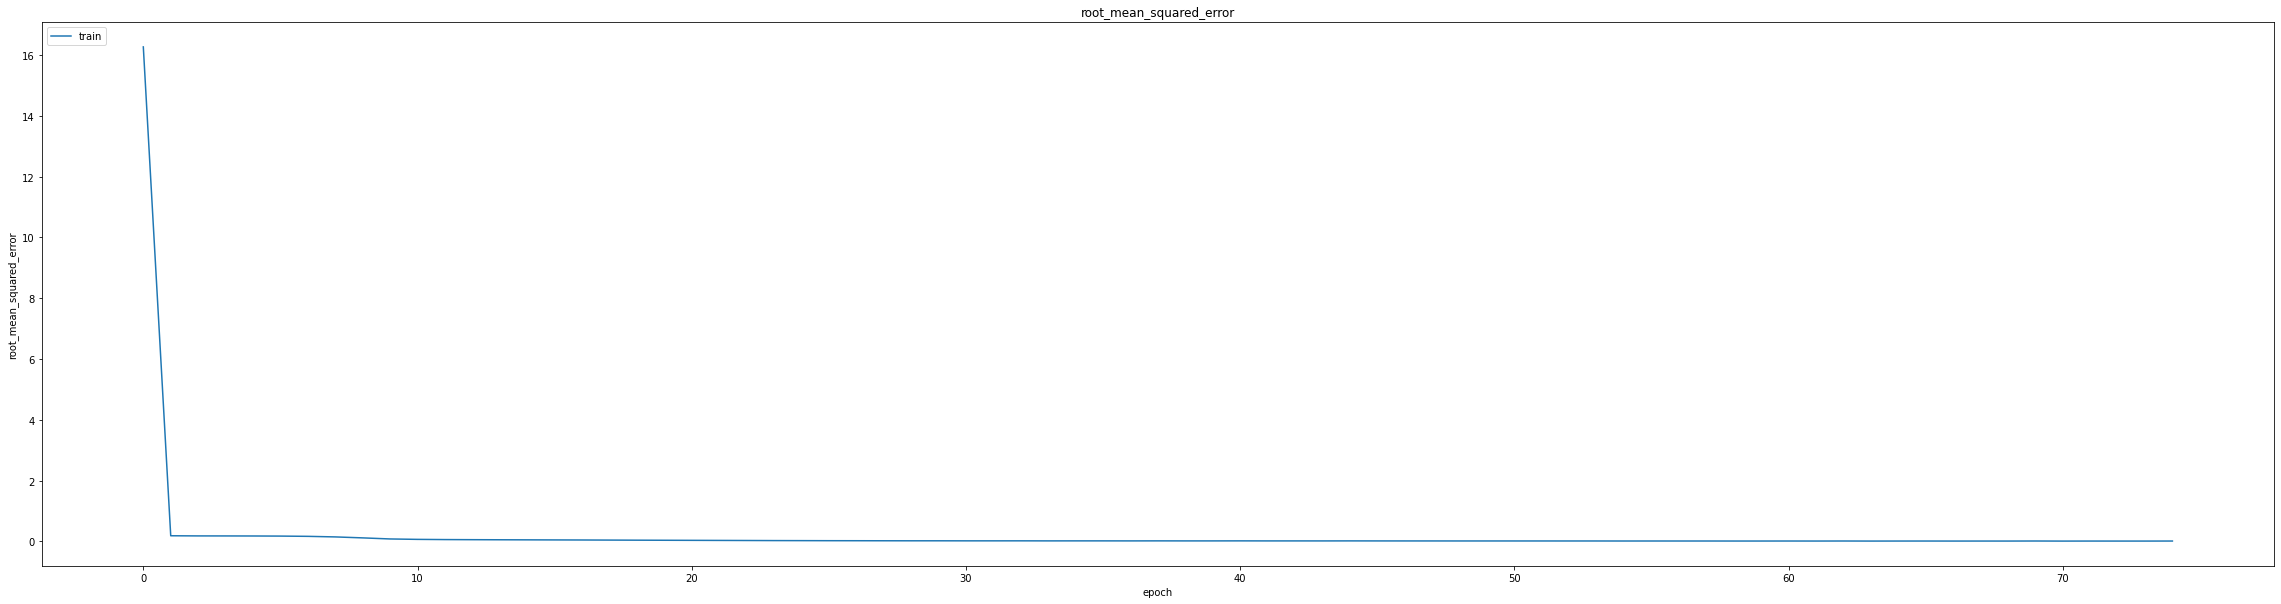

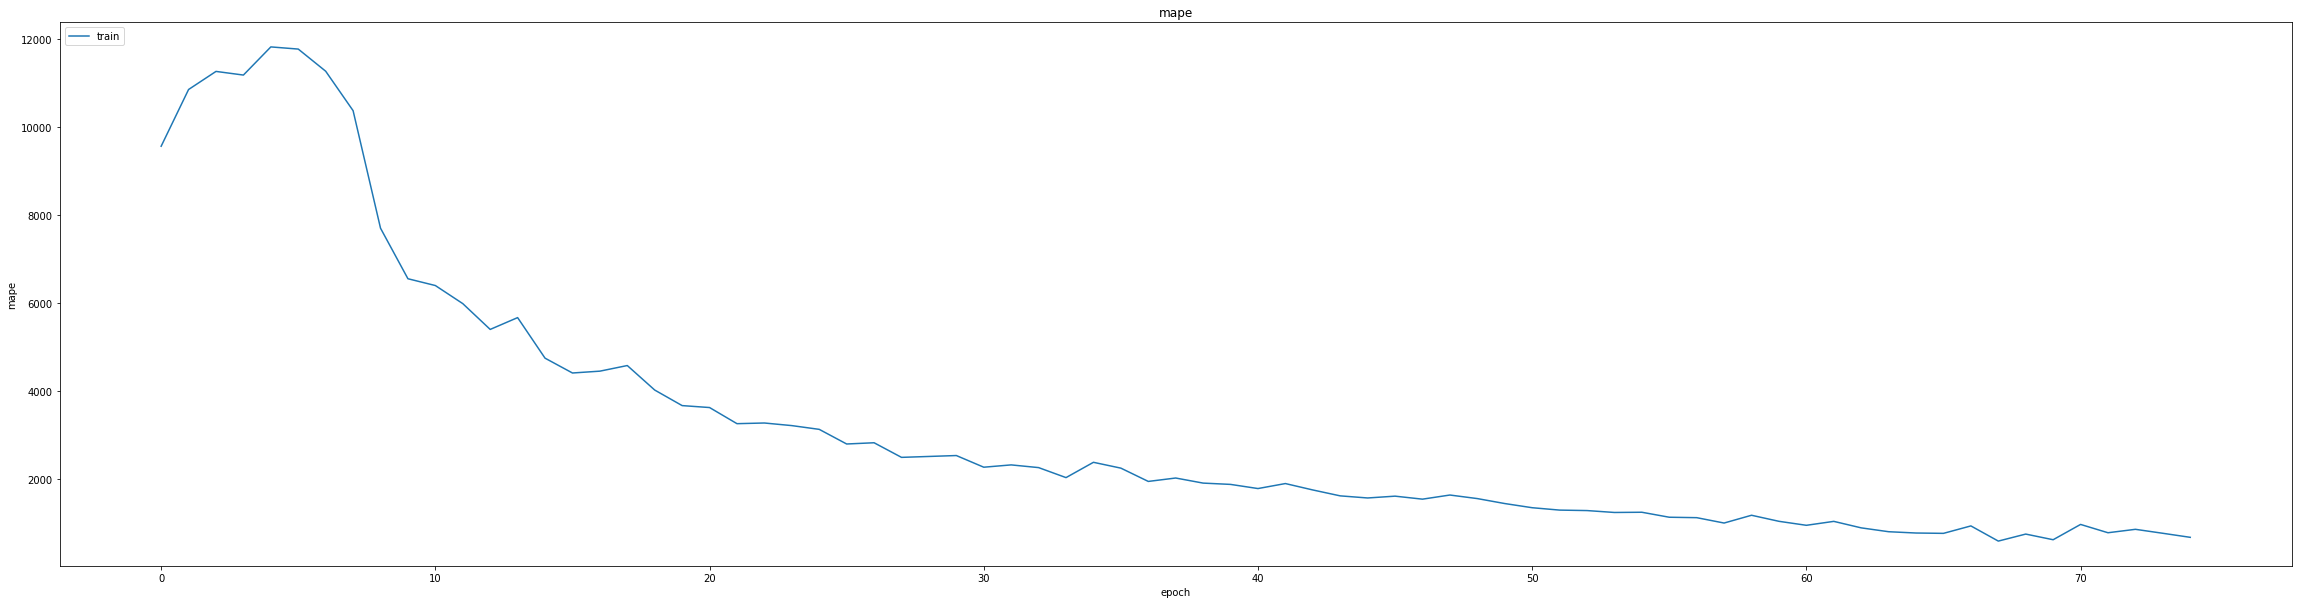

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01780989207327366
0.02208239771425724
234/234 [==============================] - 11s 38ms/step
0.9792799494239091


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 3.9518e-04 - mae: 0.0073 - mse: 3.9518e-04 - root_mean_squared_error: 0.0199 - mape: 667.8513
Epoch 1: val_mse did not improve from 0.00049
464/464 [==============================] - 150s 305ms/step - loss: 3.9518e-04 - mae: 0.0073 - mse: 3.9518e-04 - root_mean_squared_error: 0.0199 - mape: 667.8513 - val_loss: 8.3852e-04 - val_mae: 0.0250 - val_mse: 8.3852e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 8648.7676 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.4631e-05 - mae: 0.0029 - mse: 1.4631e-05 - root_mean_squared_error: 0.0038 - mape: 668.3858
Epoch 2: val_mse did not improve from 0.00049
464/464 [==============================] - 136s 294ms/step - loss: 1.4631e-05 - mae: 0.0029 - mse: 1.4631e-05 - root_mean_squared_error: 0.0038 - mape: 668.3858 - val_loss: 8.1153e-04 - val_mae: 0.0244 - val_mse: 8.1153e-04 - val_root_mean_squared_error: 0.0285 - val_mape: 10196.009

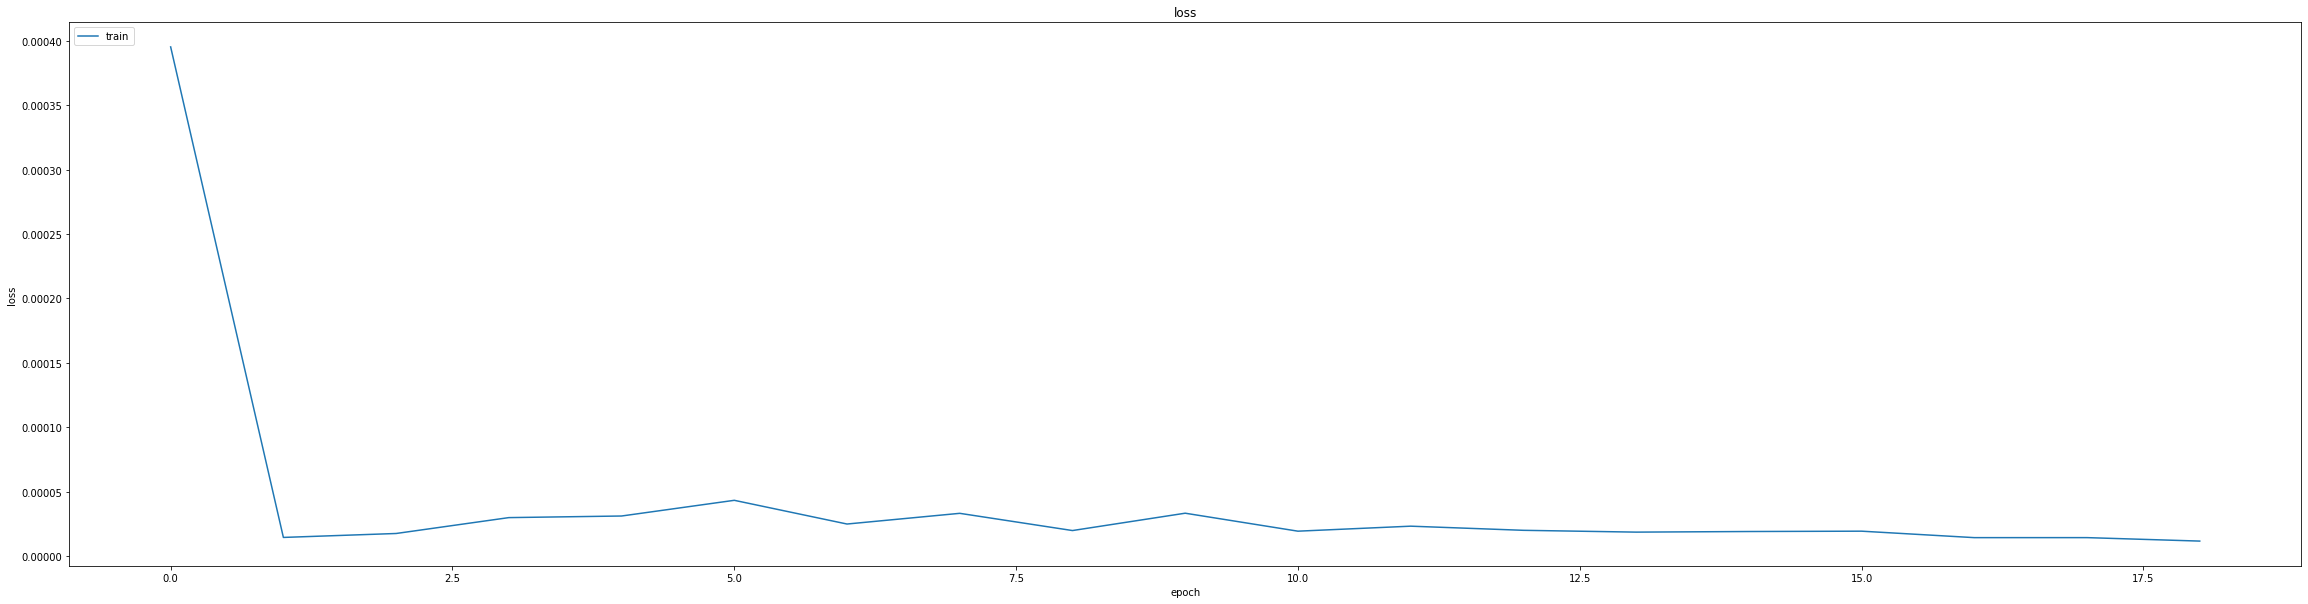

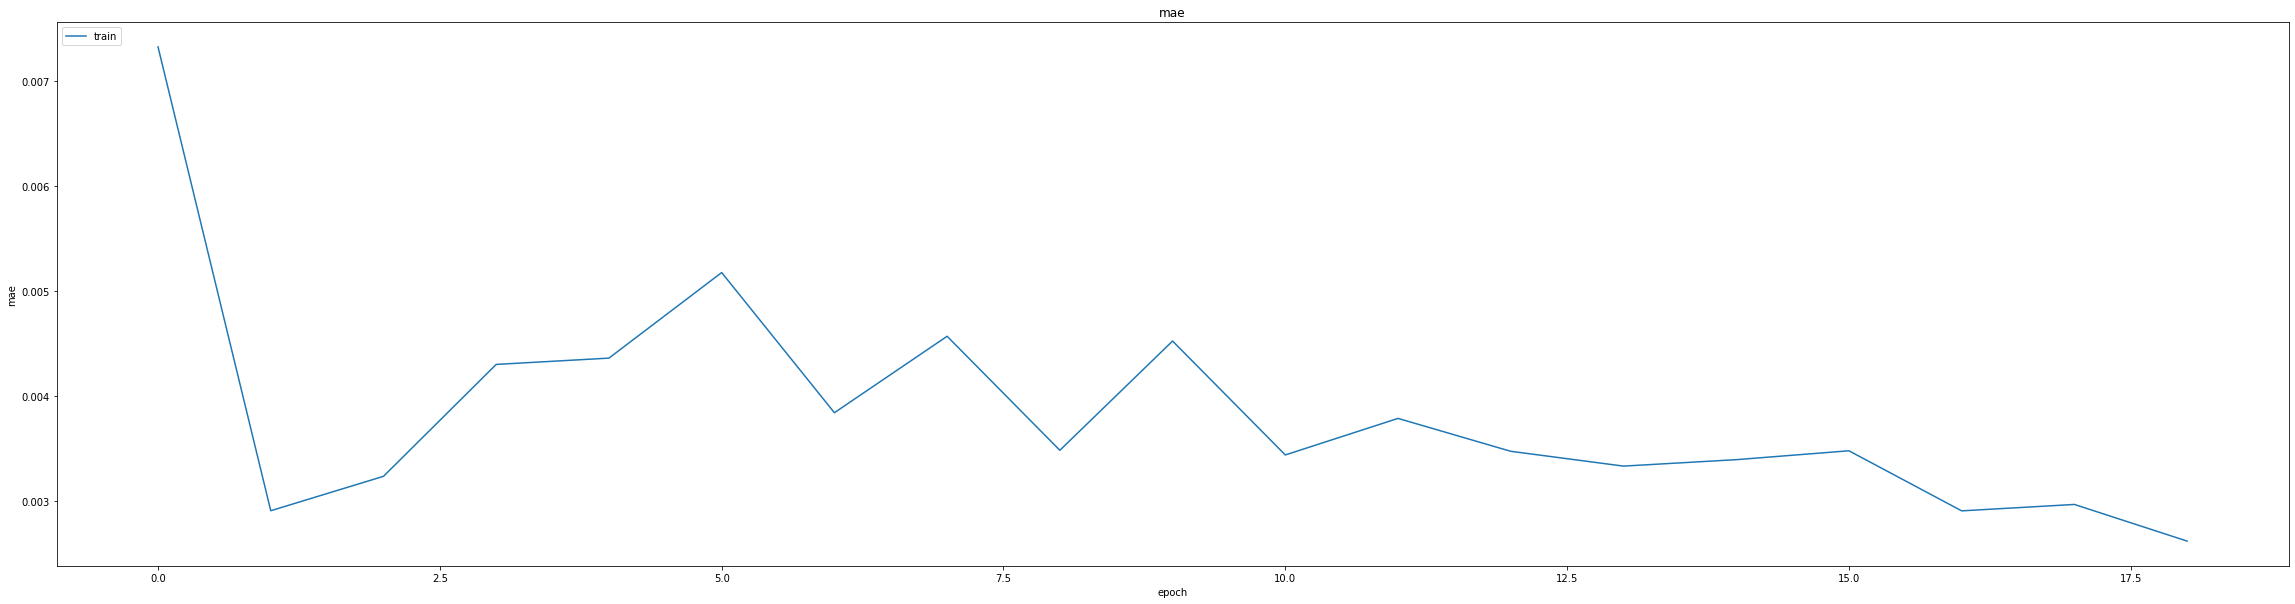

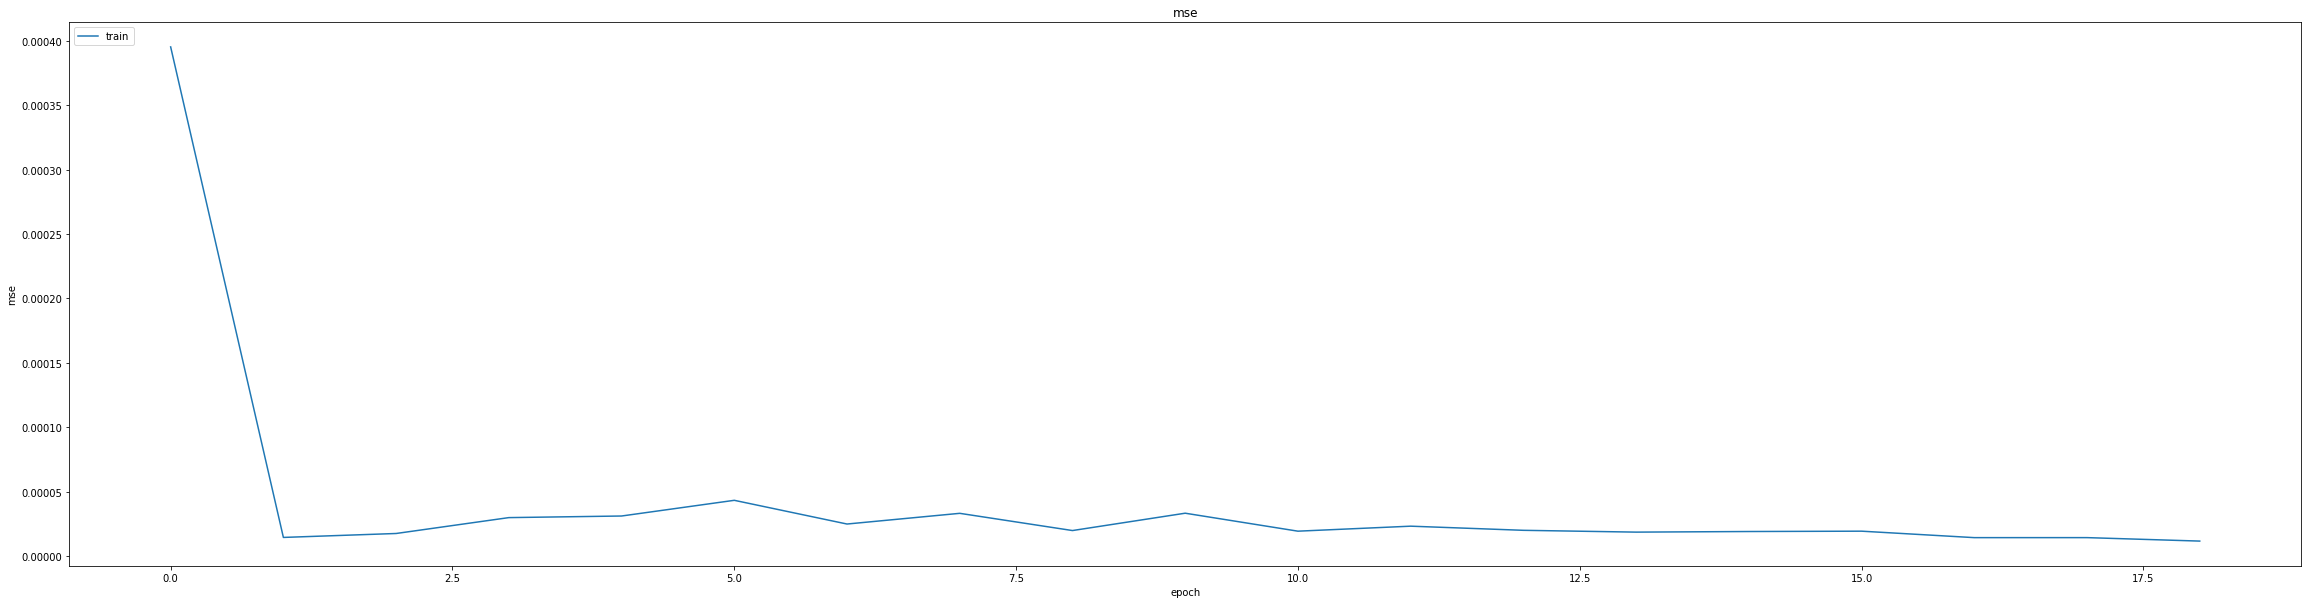

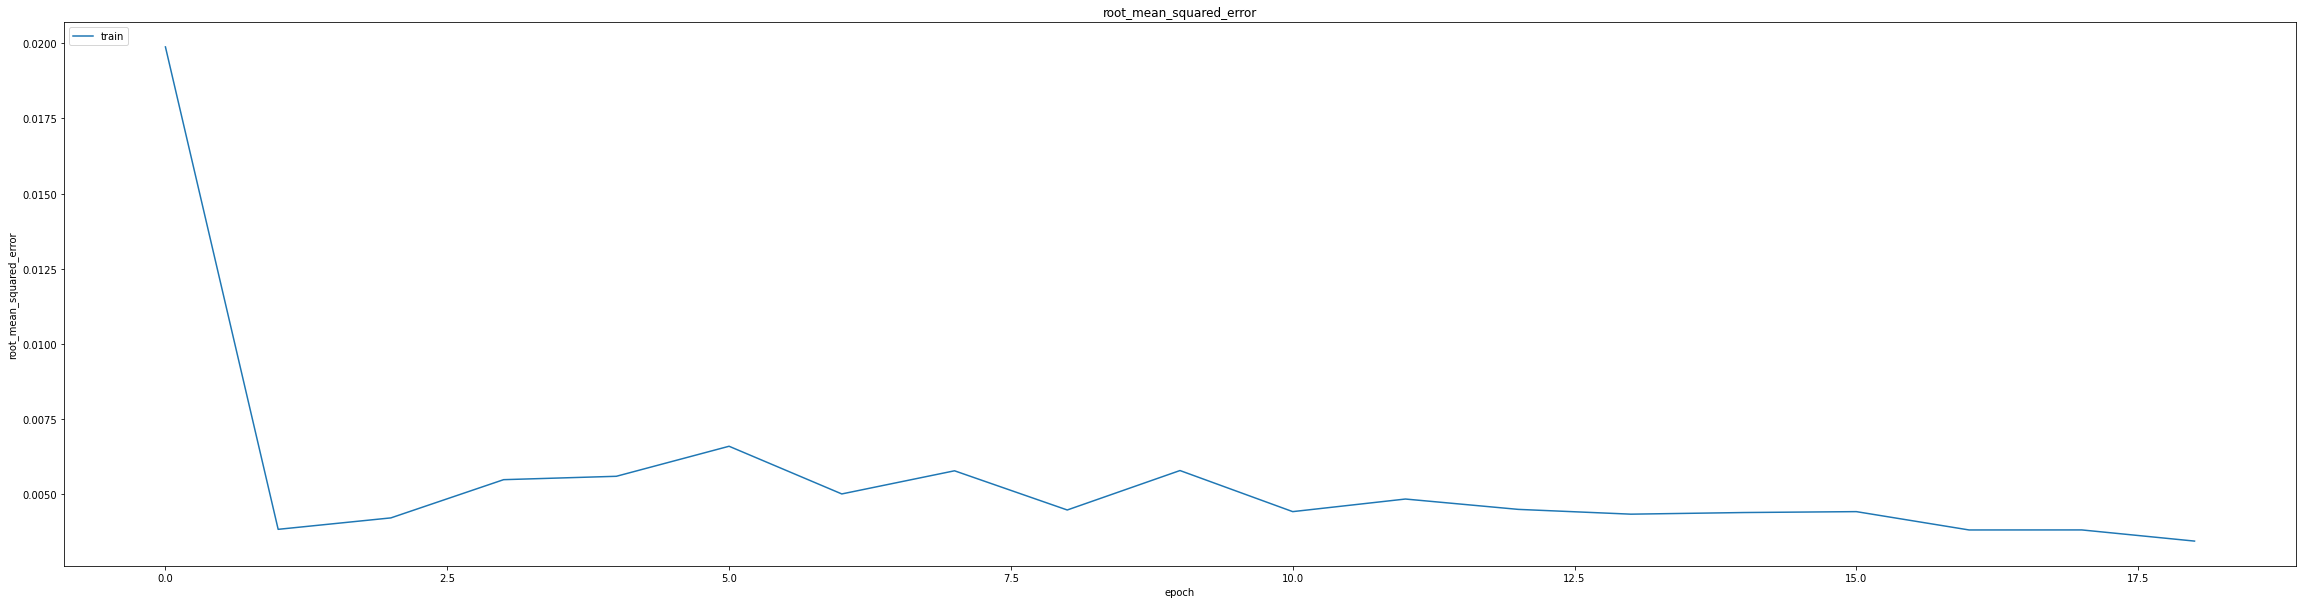

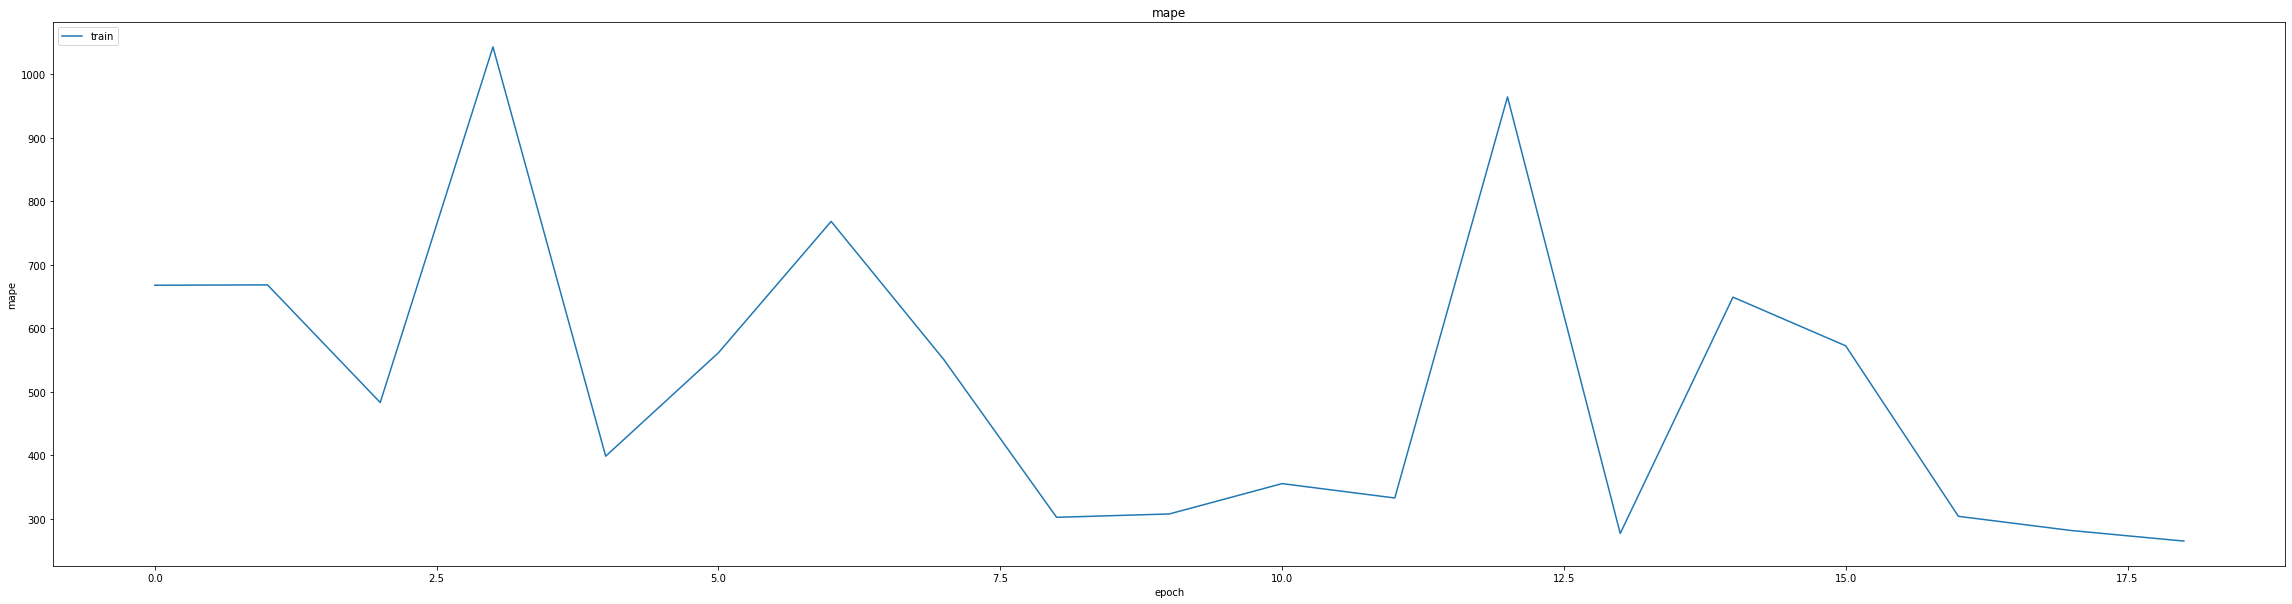

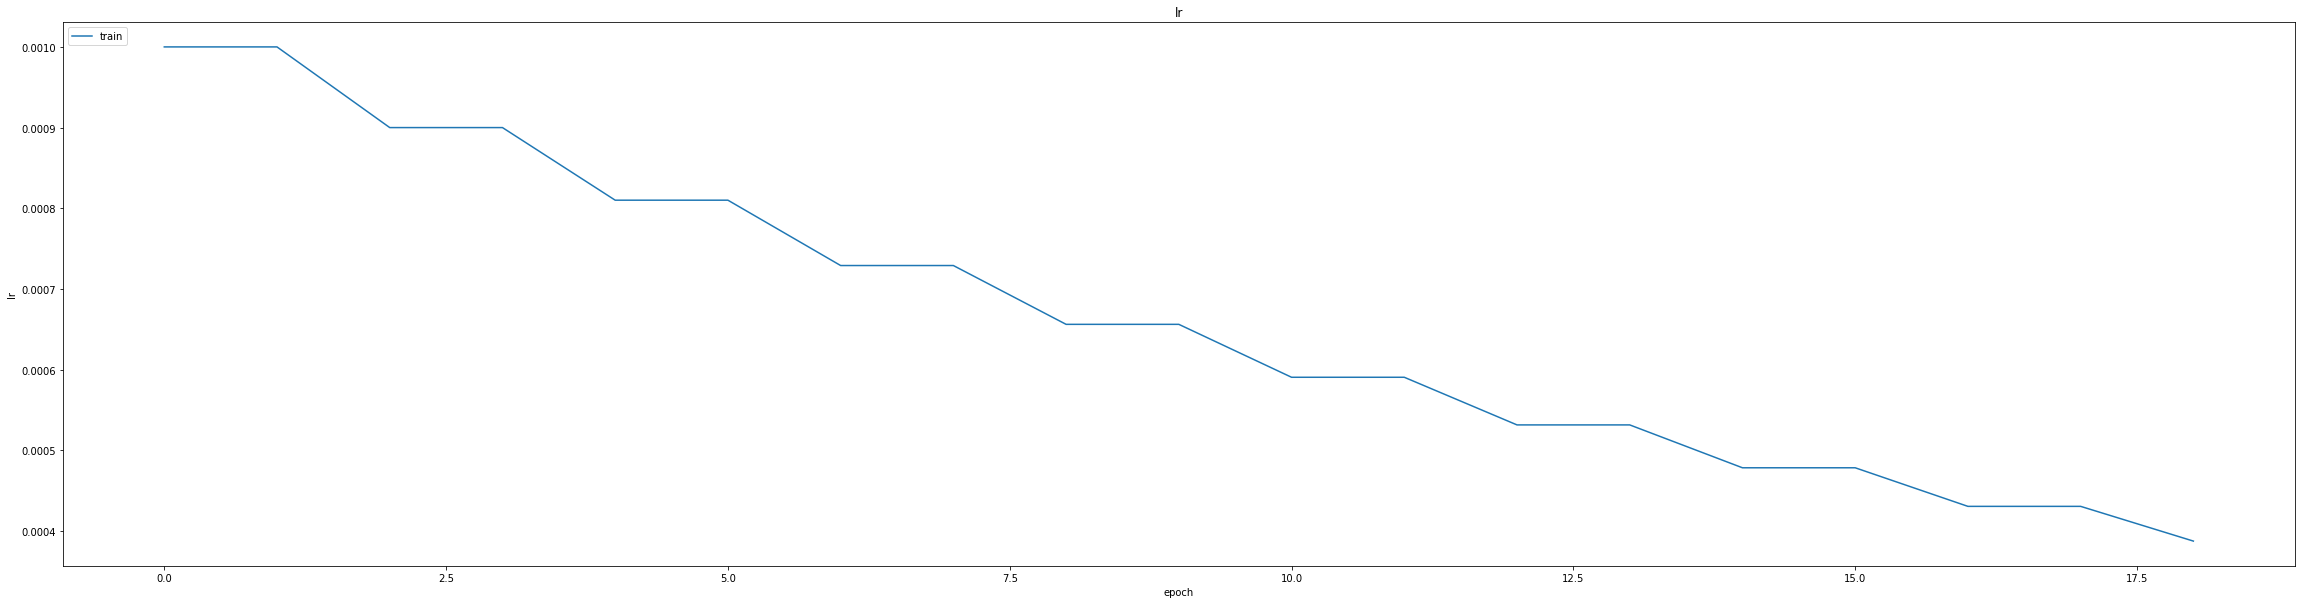

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.020460037514567375
0.024696310982108116
234/234 [==============================] - 25s 88ms/step
0.9847446394492095


234/234 [==============================] - 9s 39ms/step


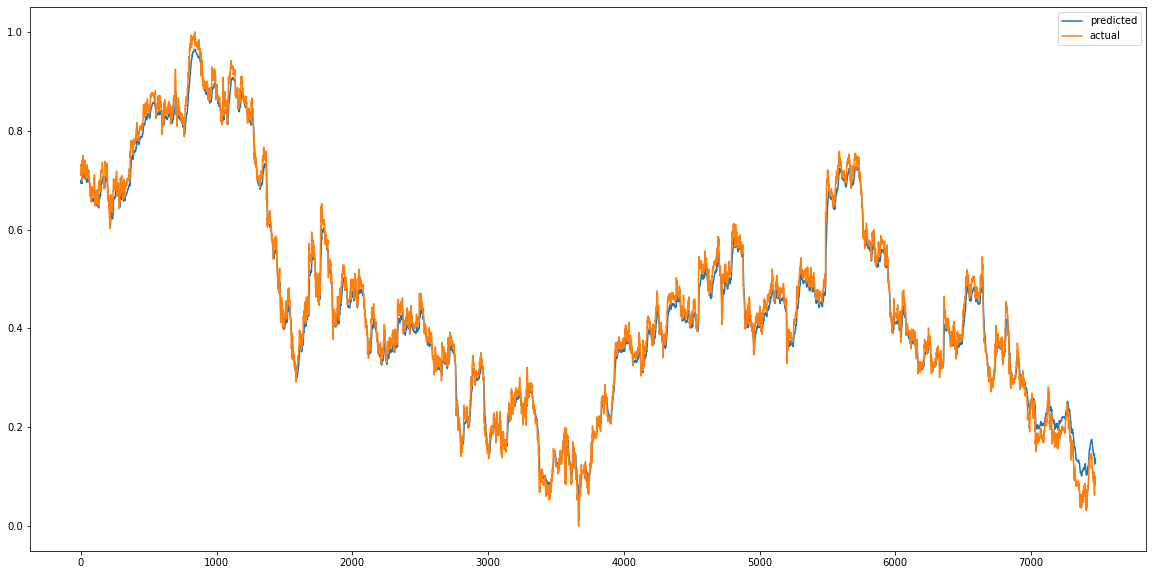

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


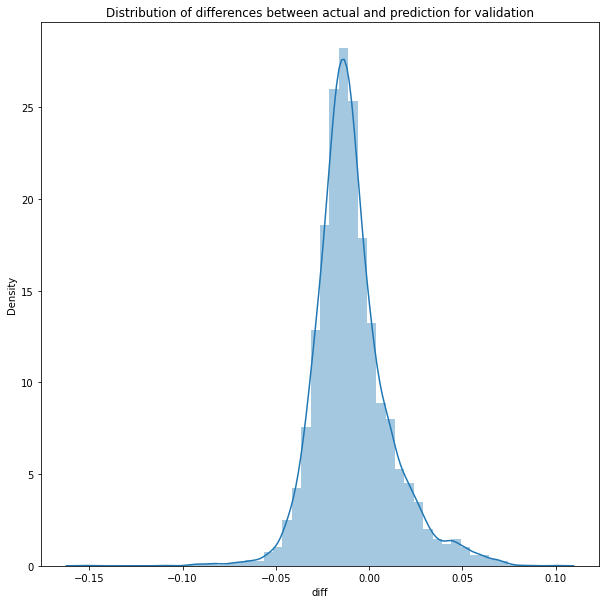

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 38ms/step


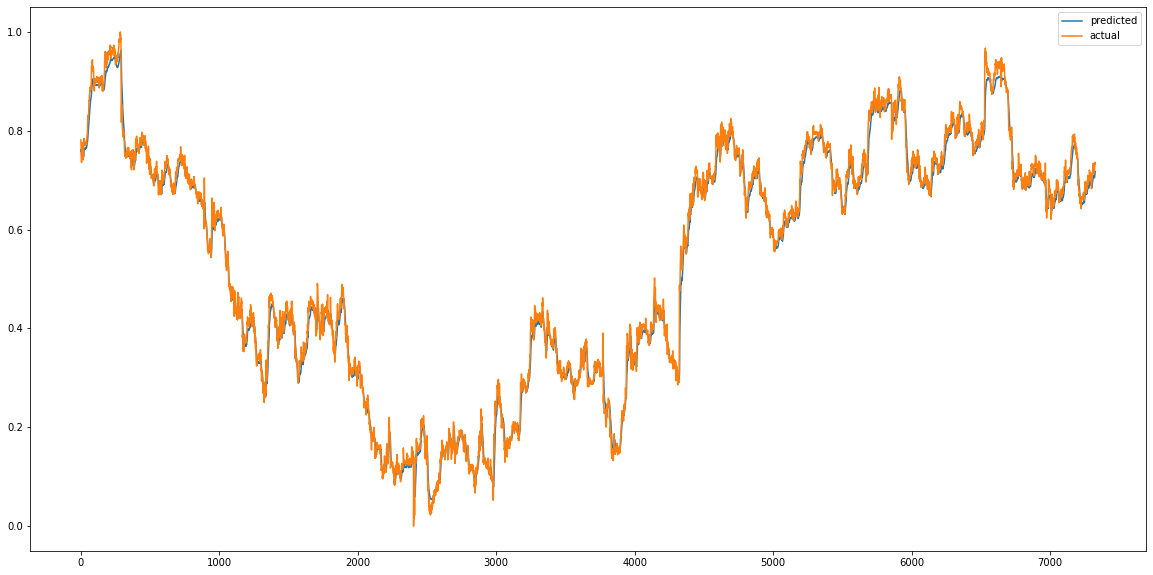

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


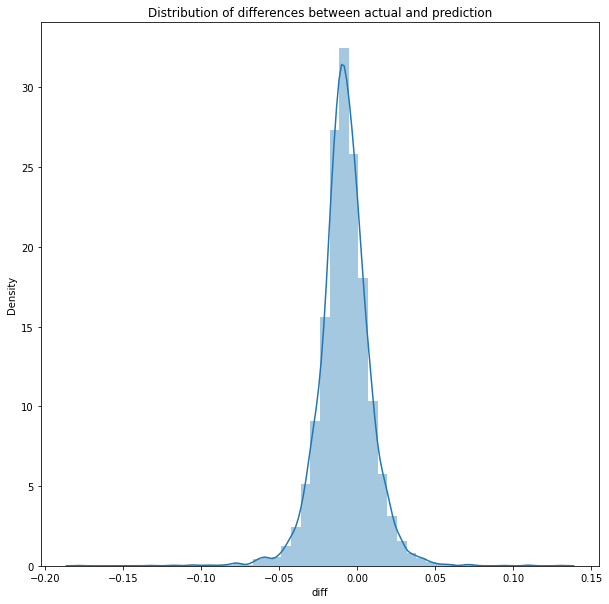

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0003309459042331803
MAE :  0.013678778142399982
RMSE  : 0.018191918651785478
229/229 [==============================] - 9s 38ms/step
R2_Score  : 0.9946768169817944


count    7327.000000
mean       -0.008016
std         0.016332
min        -0.178281
25%        -0.016484
50%        -0.008178
75%         0.000881
max         0.130509
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 550.4611 - mae: 5.8000 - mse: 550.4611 - root_mean_squared_error: 23.4619 - mape: 28192.6445
Epoch 1: val_mse improved from inf to 1.03509, saving model to weights.best.hdf5
464/464 [==============================] - 141s 290ms/step - loss: 550.4611 - mae: 5.8000 - mse: 550.4611 - root_mean_squared_error: 23.4619 - mape: 28192.6445 - val_loss: 1.0351 - val_mae: 0.9933 - val_mse: 1.0351 - val_root_mean_squared_error: 1.0174 - val_mape: 194379.0312
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.2614 - mae: 0.4535 - mse: 0.2614 - root_mean_squared_error: 0.5113 - mape: 20942.1016
Epoch 2: val_mse improved from 1.03509 to 0.19962, saving model to weights.best.hdf5
464/464 [==============================] - 130s 280ms/step - loss: 0.2614 - mae: 0.4535 - mse: 0.2614 - root_mean_squared_error: 0.5113 - mape: 20942.1016 - val_loss: 0.1996 - val_mae: 0.3965 - val_mse: 0.1996 - val_root_mean_squared_er

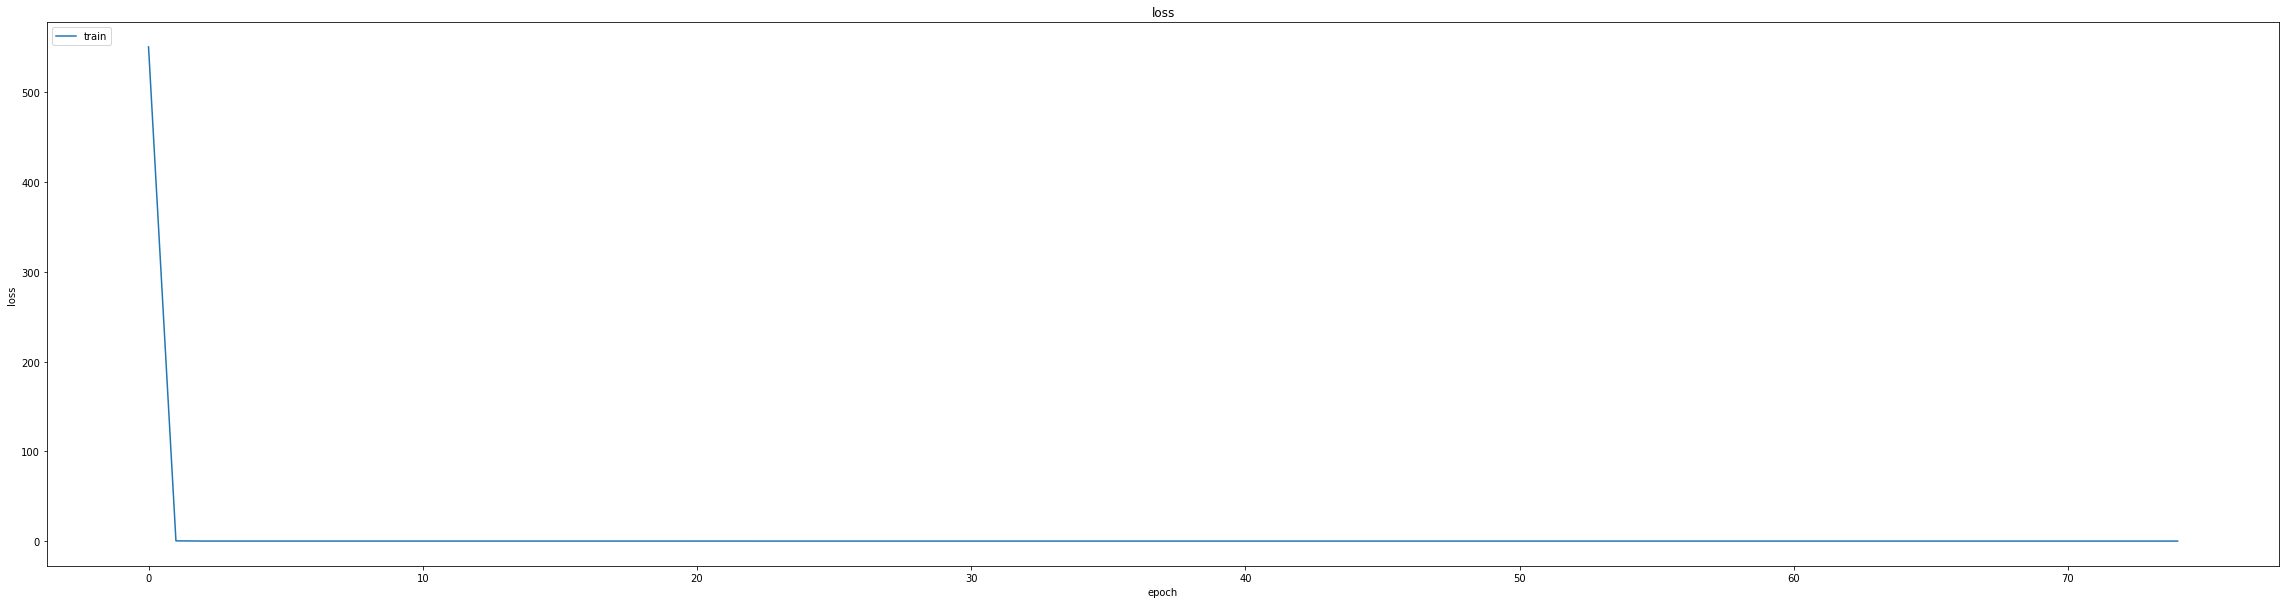

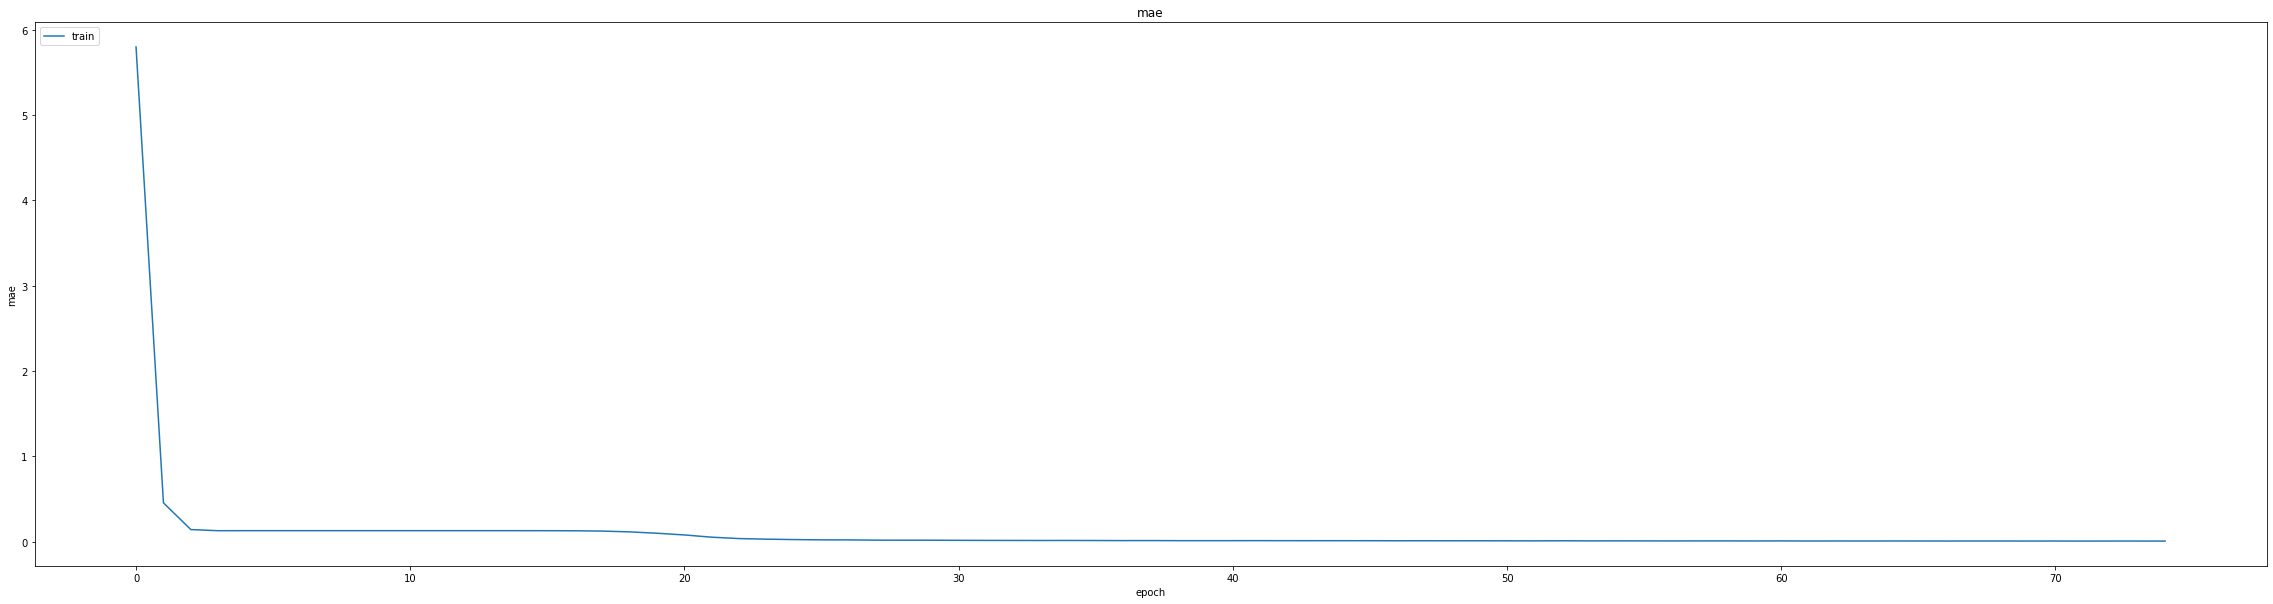

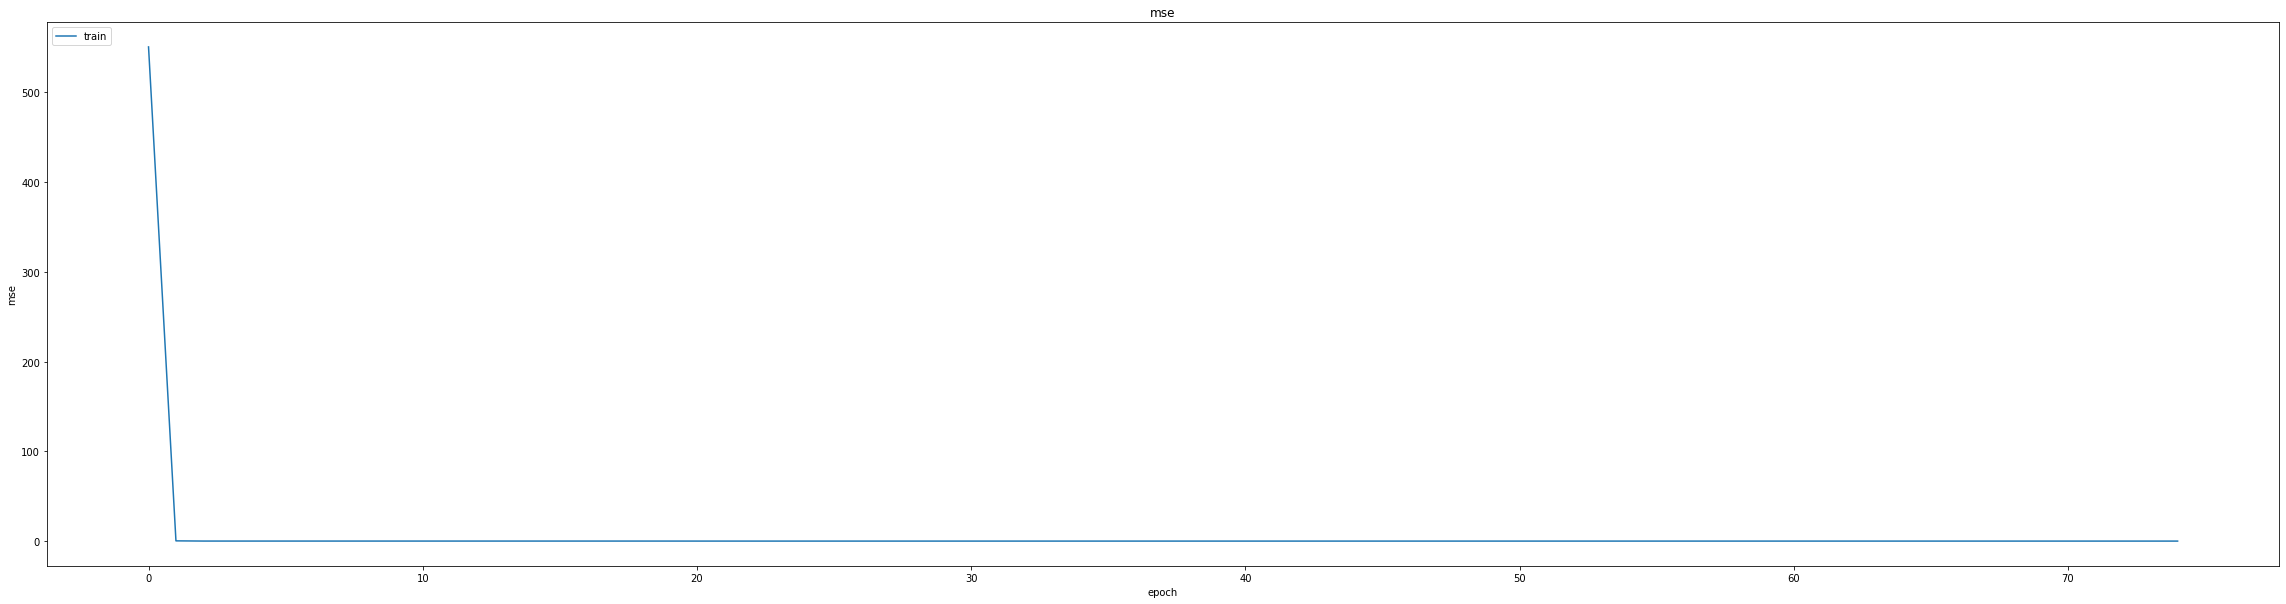

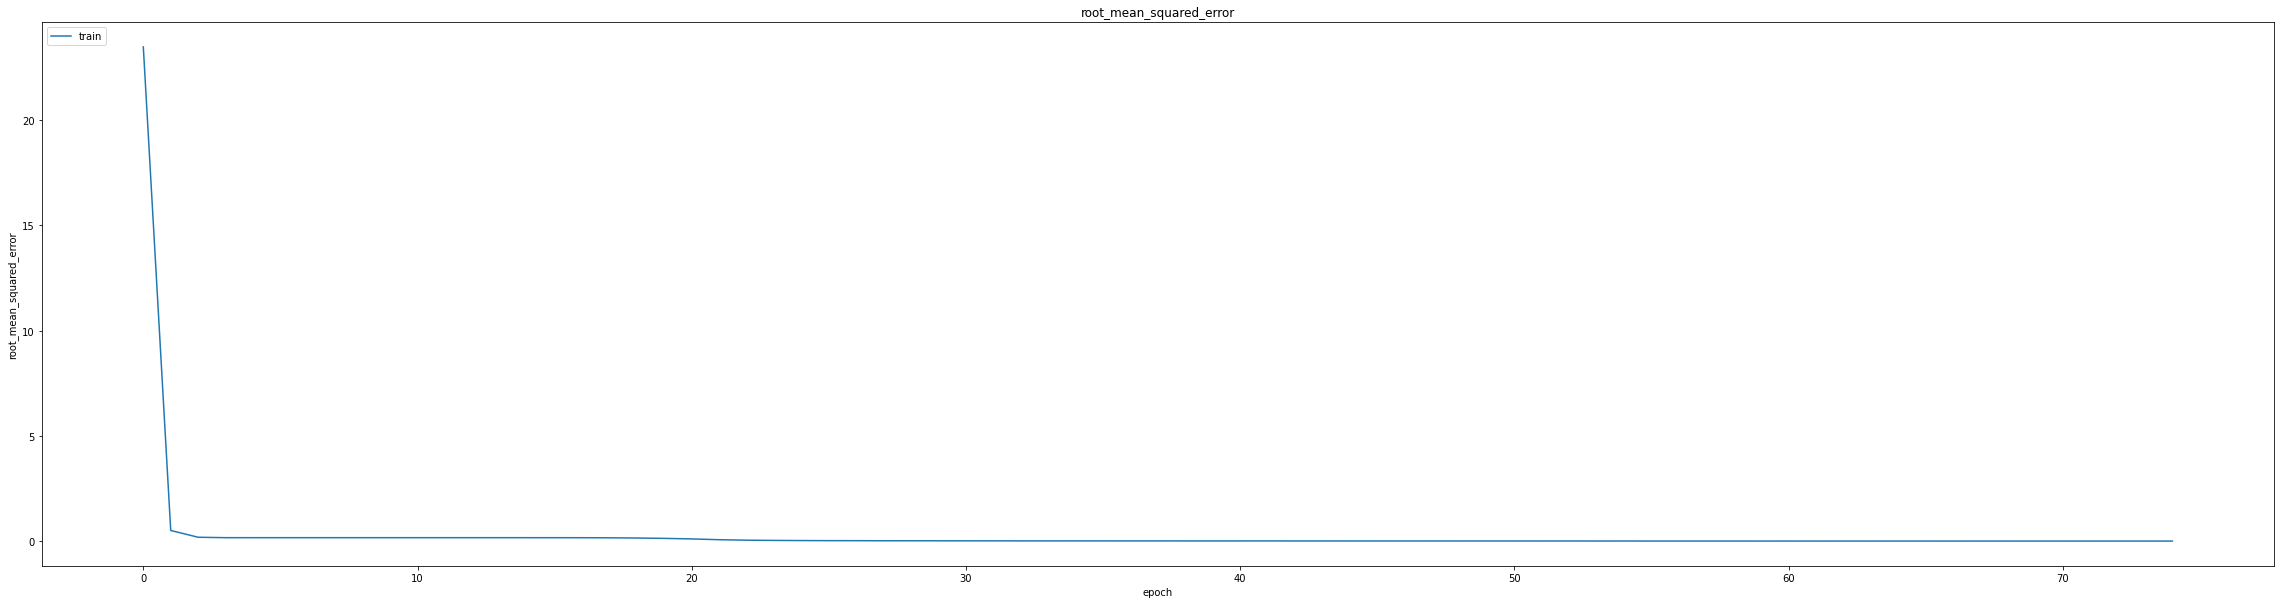

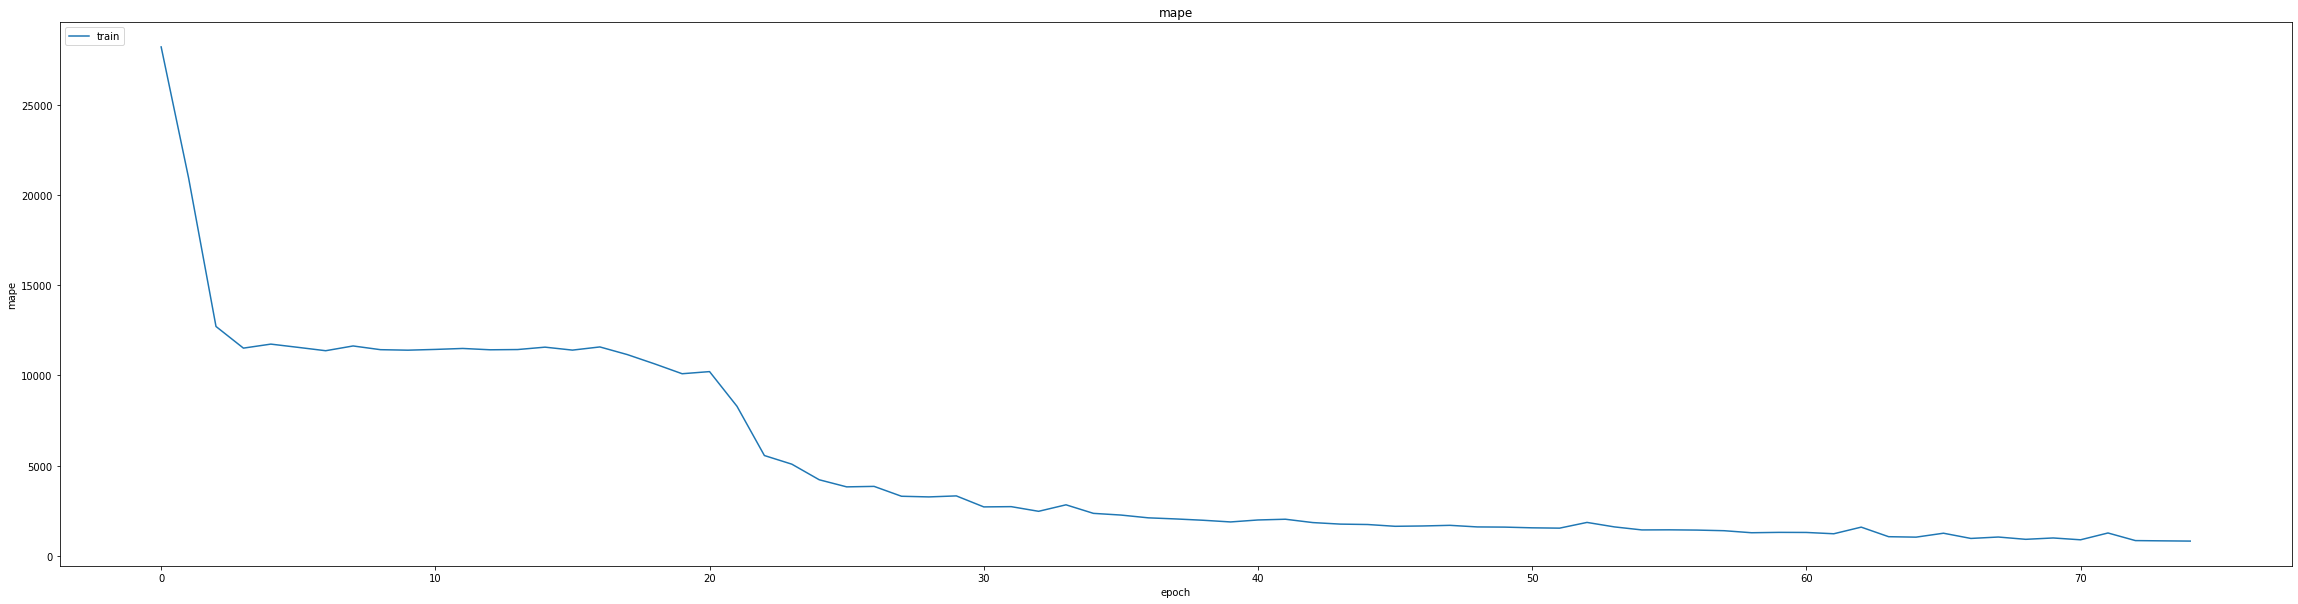

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015553015284240246
0.021058131009340286
234/234 [==============================] - 11s 40ms/step
0.977649472295161


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]
Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 6.5147e-04 - mae: 0.0112 - mse: 6.5147e-04 - root_mean_squared_error: 0.0255 - mape: 1490.8683
Epoch 1: val_mse did not improve from 0.00044
464/464 [==============================] - 139s 287ms/step - loss: 6.5147e-04 - mae: 0.0112 - mse: 6.5147e-04 - root_mean_squared_error: 0.0255 - mape: 1490.8683 - val_loss: 7.3751e-04 - val_mae: 0.0212 - val_mse: 7.3751e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 12245.6973 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 5.7881e-05 - mae: 0.0058 - mse: 5.7881e-05 - root_mean_squared_error: 0.0076 - mape: 1347.4607
Epoch 2: val_mse did not improve from 0.00044
464/464 [==============================] - 135s 292ms/step - loss: 5.7881e-05 - mae: 0.0058 - mse: 5.7881e-05 - root_mean_squared_error: 0.0076 - mape: 1347.4607 - val_loss: 8.7786e-04 - val_mae: 0.0244 - val_mse: 8.7786e-04 - val_root_mean_squared_error: 0.0296 - val_mape: 1123

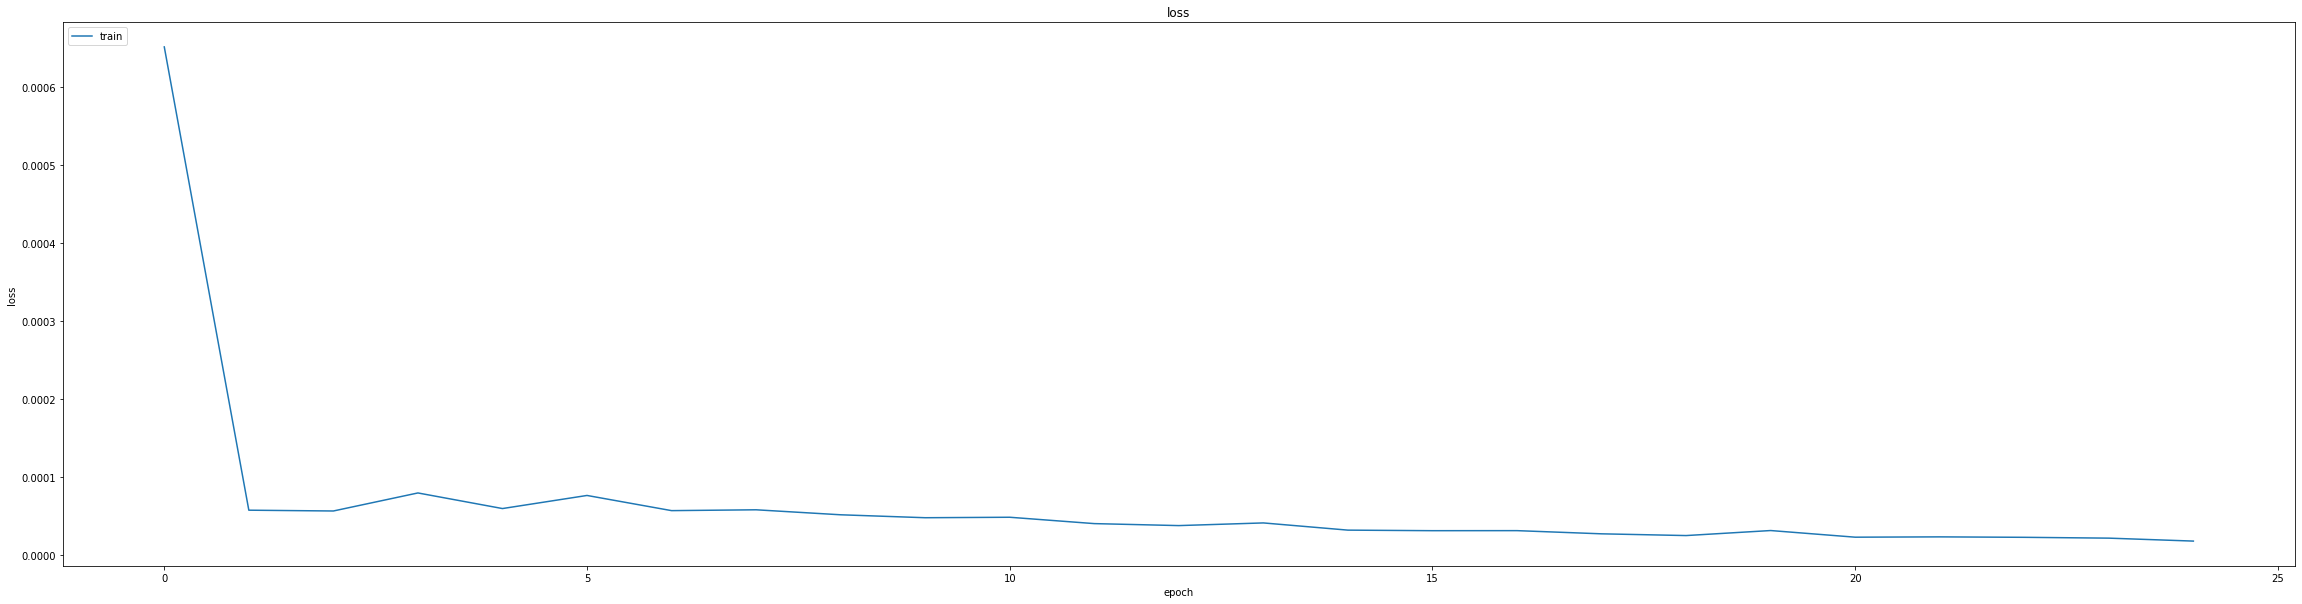

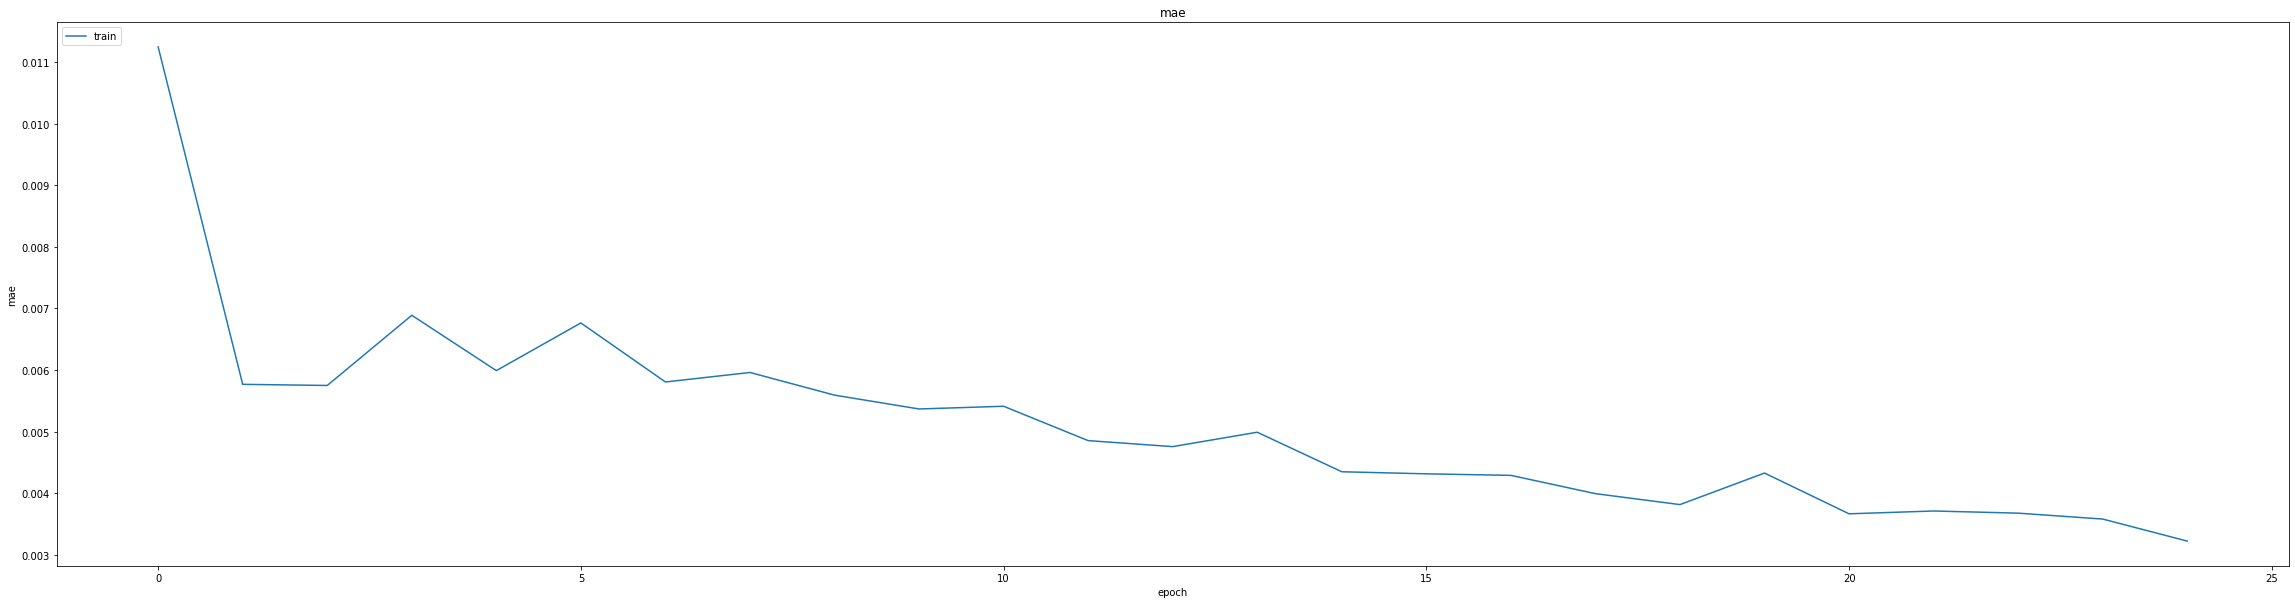

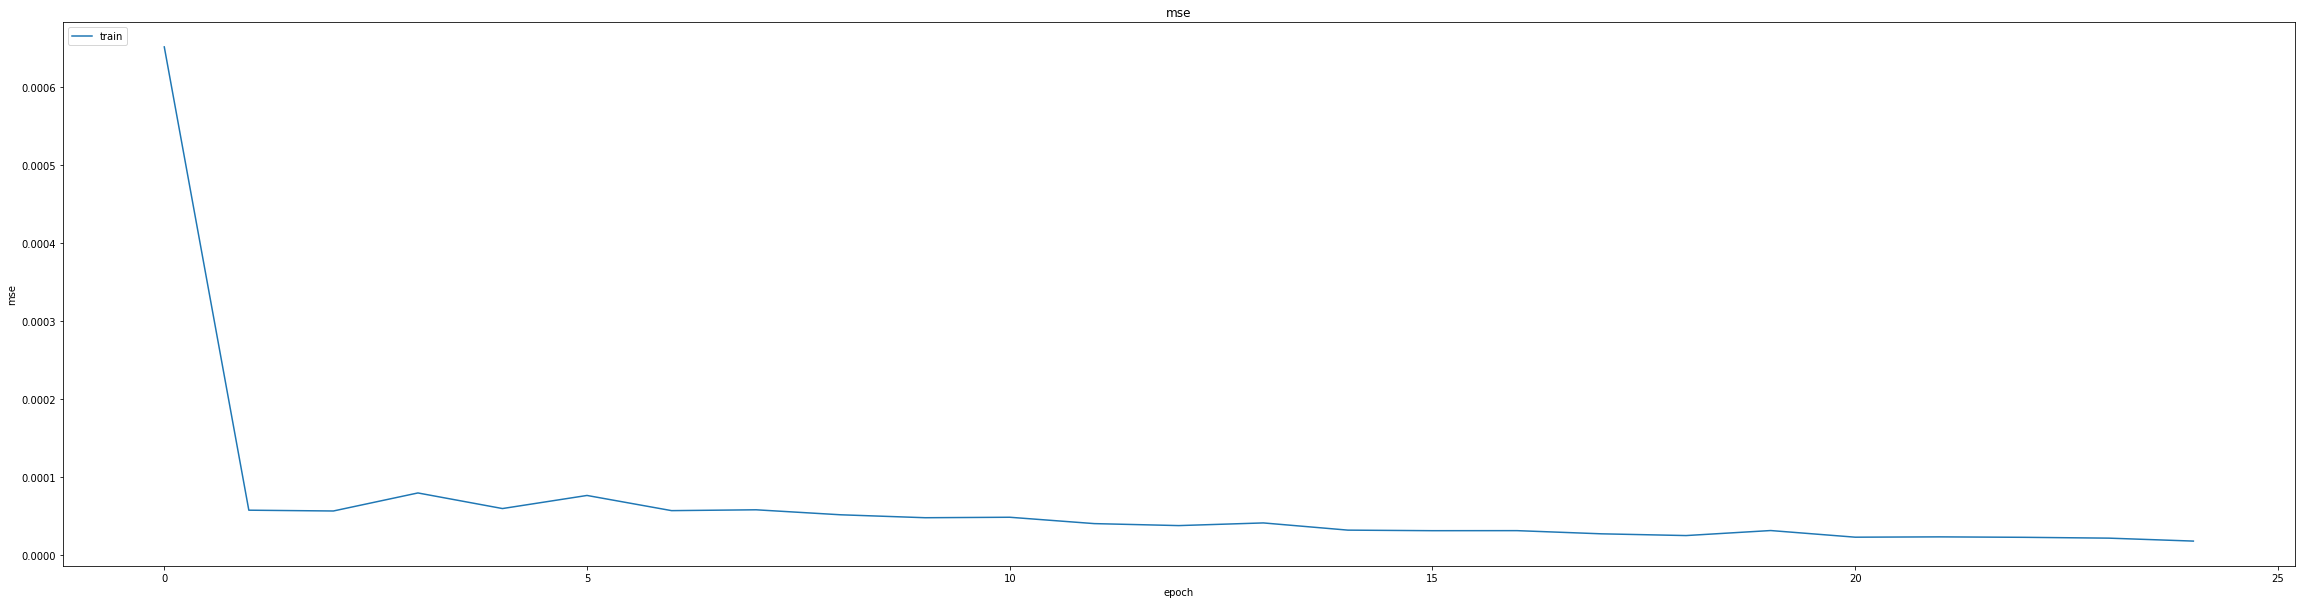

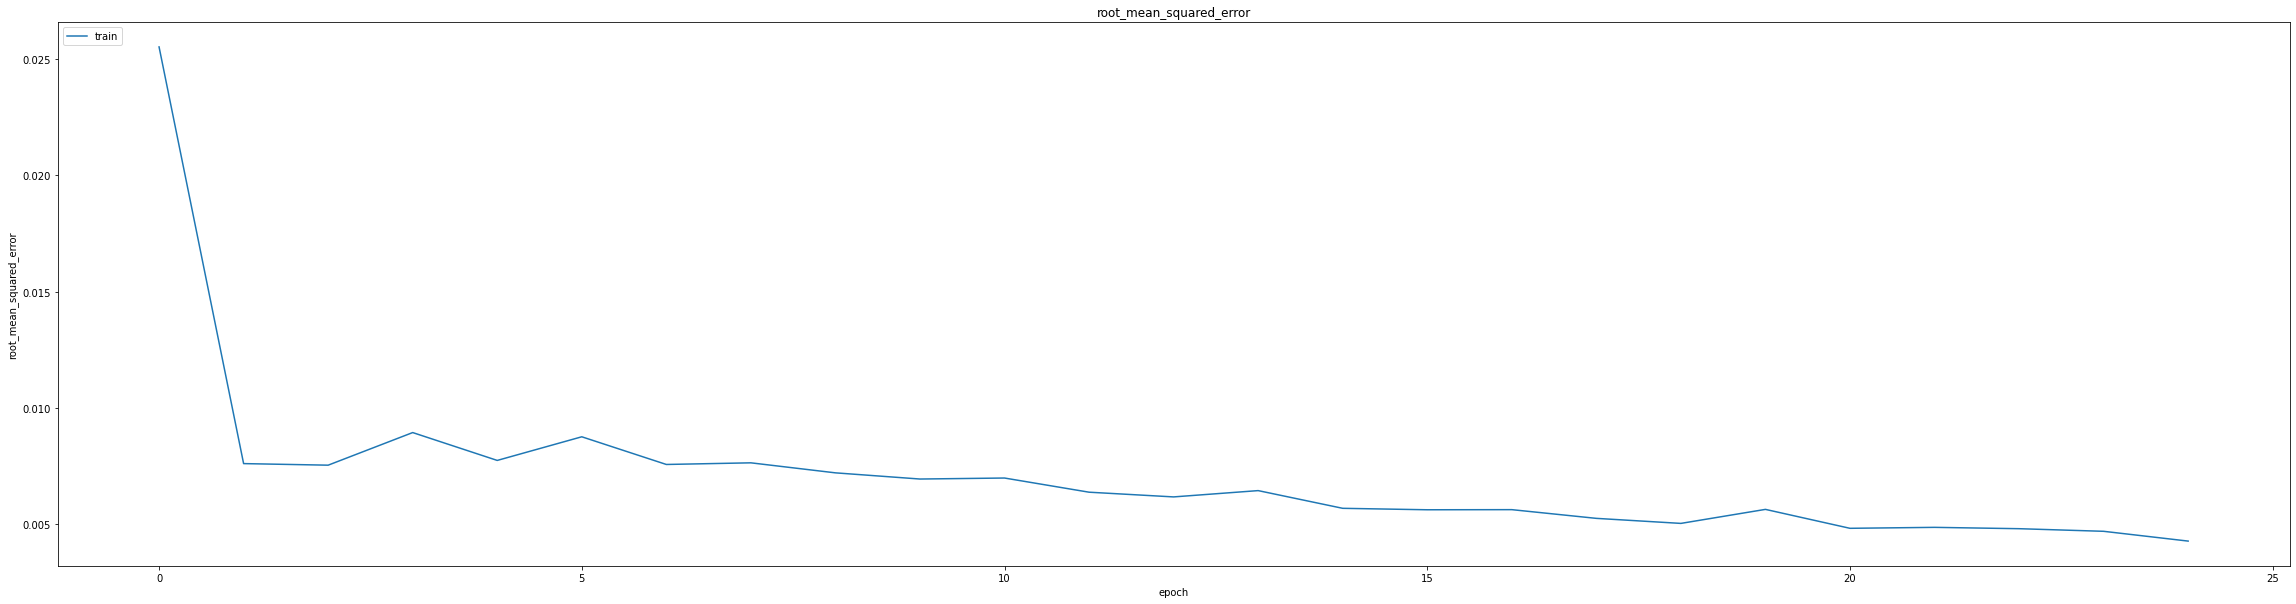

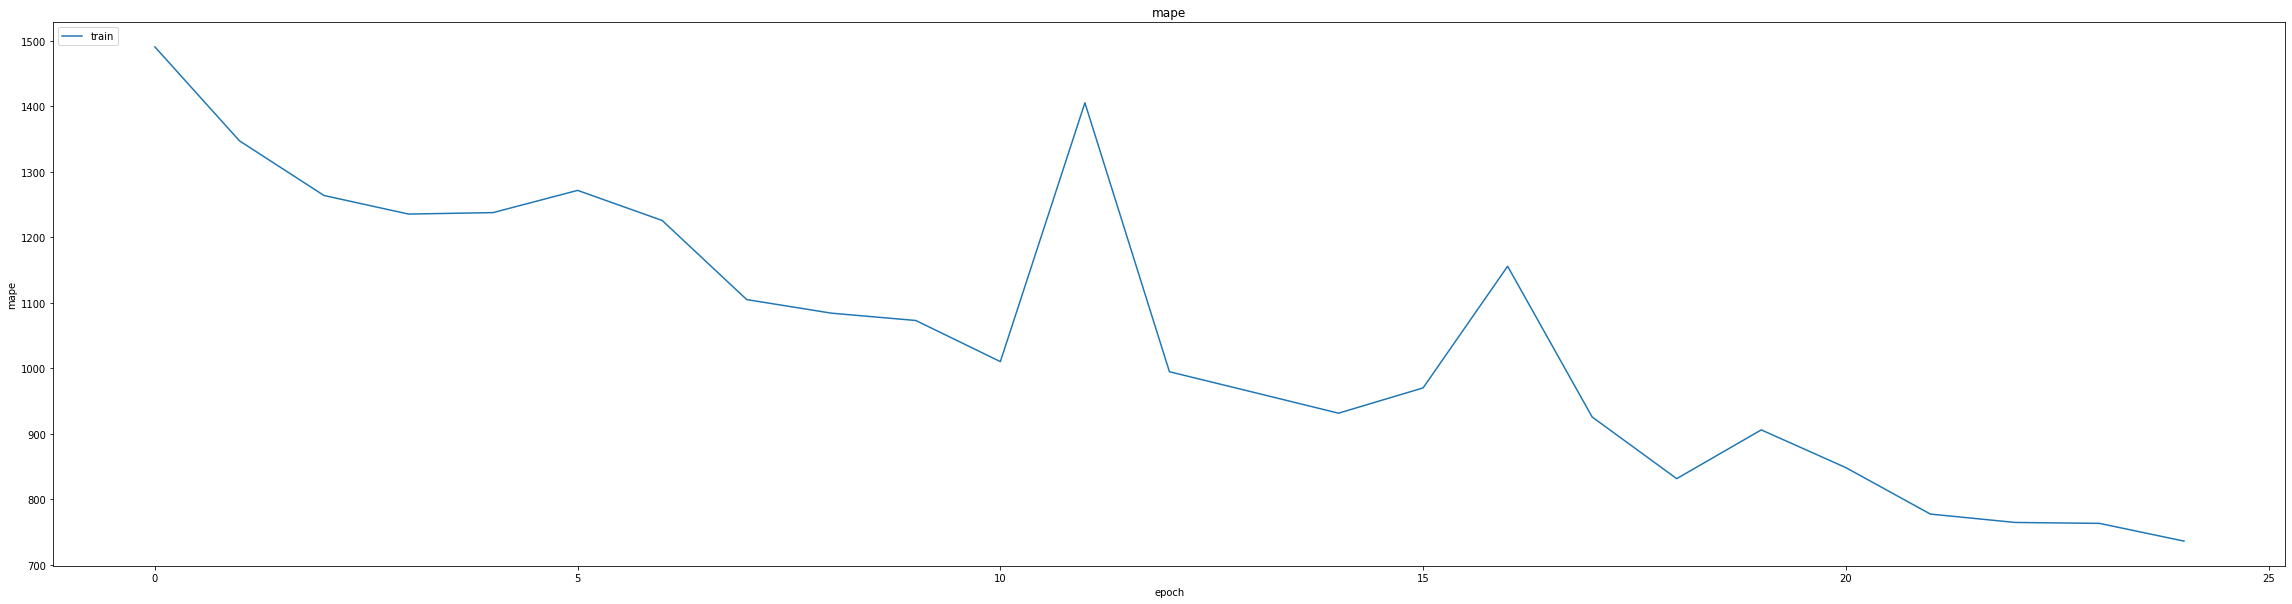

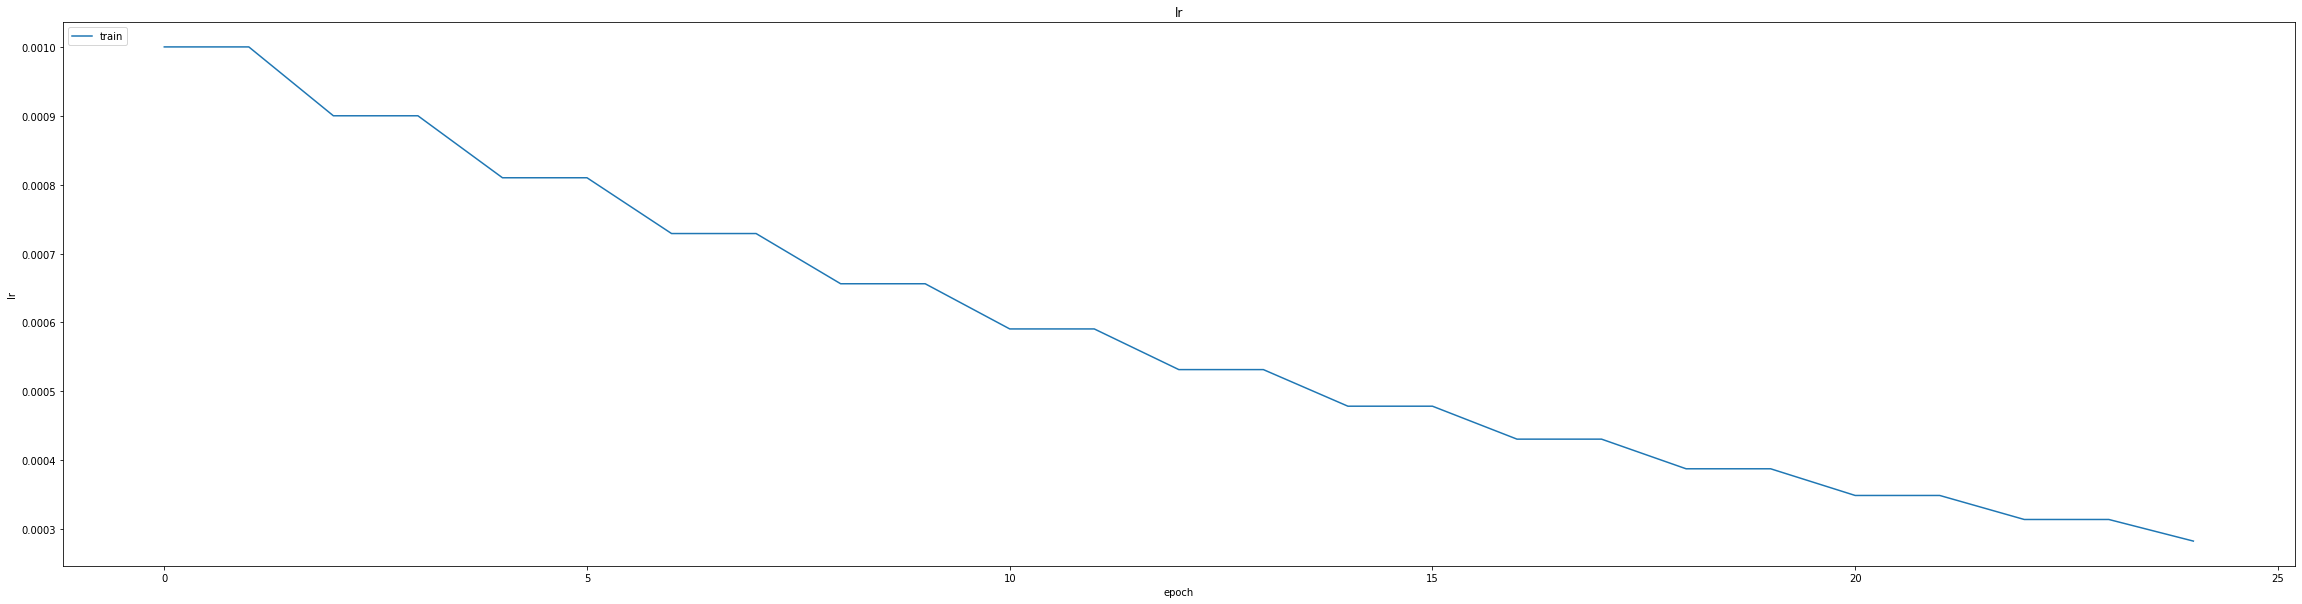

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.019846303388476372
0.024720486253499985
234/234 [==============================] - 10s 37ms/step
0.9804359166353311


In [ ]:
model.load_weights("weights.best.hdf5")

234/234 [==============================] - 11s 46ms/step


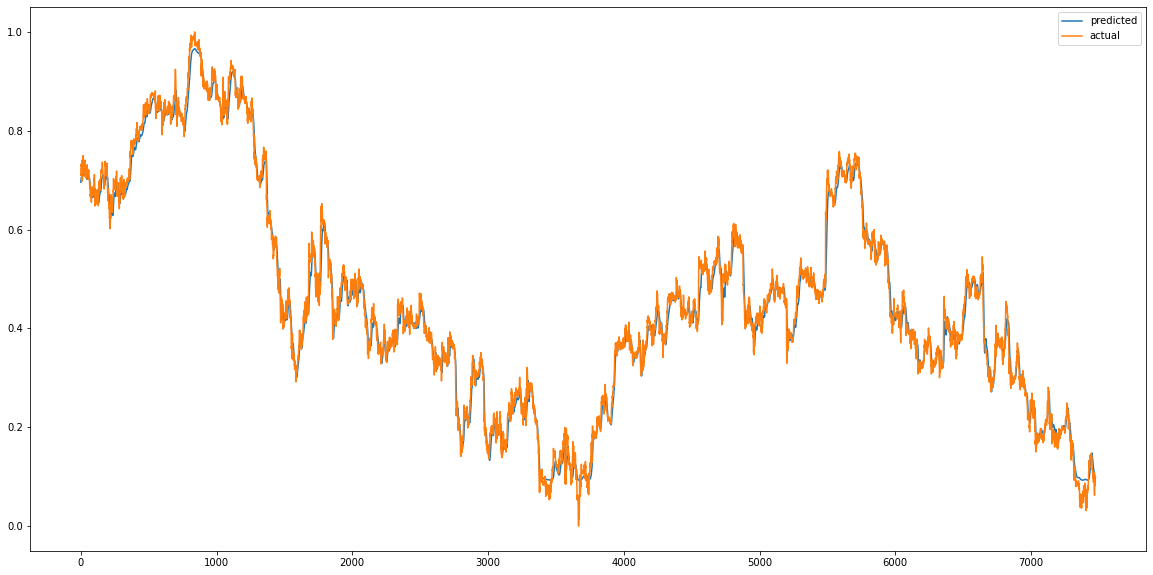

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


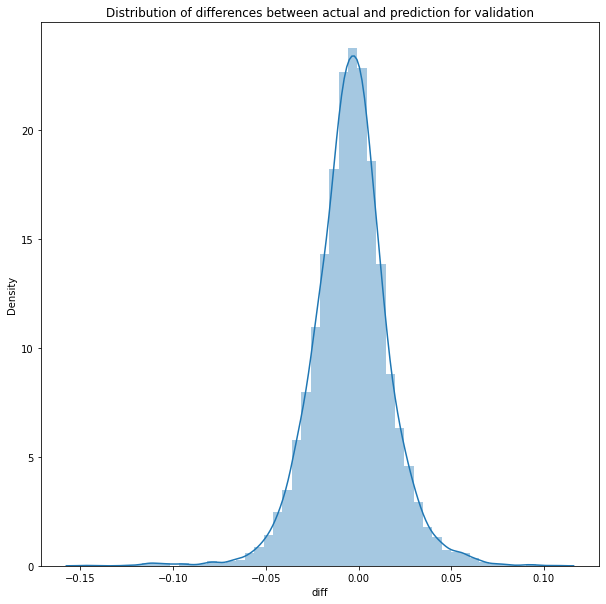

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 15s 64ms/step


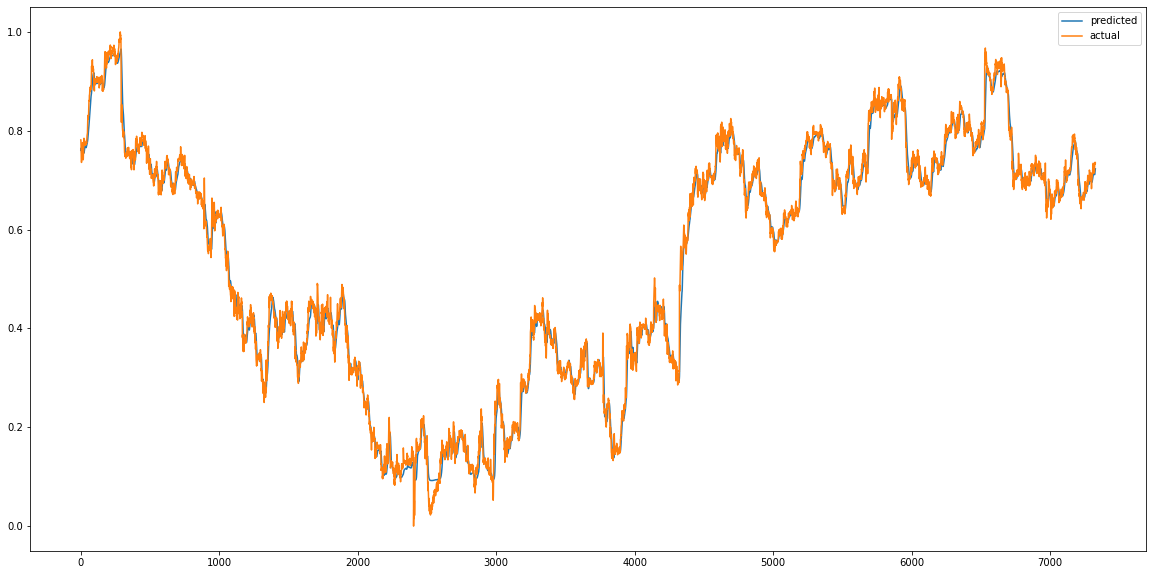

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


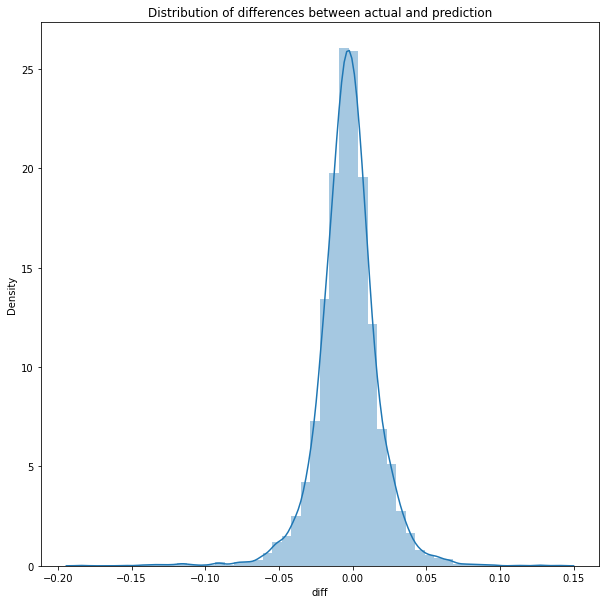

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)

predictions['diff'].describe()

MSE :  0.0004333681404030258
MAE :  0.014632320777649473
RMSE  : 0.020817496016644888
229/229 [==============================] - 9s 38ms/step
R2_Score  : 0.9930293806593238


count    7327.000000
mean       -0.003095
std         0.020588
min        -0.183920
25%        -0.013308
50%        -0.002885
75%         0.007505
max         0.139637
Name: diff, dtype: float64